In [117]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [118]:
df = pd.read_csv("mrtJourneys.csv")
df.head()

commuter  0602hr  0604hr  0606hr  0608hr  0610hr  0612hr  0614hr  0616hr  \
0         1      37      31     NaN     NaN     NaN     NaN     NaN     NaN   
1         2      46      40    34.0    35.0    41.0    47.0     NaN     NaN   
2         3      36      30    24.0    18.0    12.0     6.0     NaN     NaN   
3         4       5      11    12.0    18.0    24.0    30.0    36.0    42.0   
4         5      43      49    50.0    44.0    38.0    32.0    26.0     NaN   

   0618hr  ...  0624hr  0626hr  0628hr  0630hr  0632hr  0634hr  0636hr  \
0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    48.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   0638hr  Gender  Occupation  
0     NaN    male  politician  
1     NaN  female  politician  
2     NaN  female  politician  
3     NaN  female  politician  
4     NaN    male      worker  

[5 rows x 22 columns]

In [119]:
df.iloc[:, 1:20] = df.iloc[:, 1:20].astype(float).astype(str)
df = df.astype(str)
# head = df.iloc[0:5, 1:20]
# print(head)

unique_dict = {}
col_values = []
for col in df.columns[1:20]:
    col_values.append(col)
    for cell in df[col]:
        if cell != 'nan':
            number = float(cell)
            if number not in unique_dict:
                unique_dict[number] = 1
            else: 
                unique_dict[number] += 1
myKeys = list(unique_dict.keys())
myKeys.sort()
sorted_dict = {i: unique_dict[i] for i in myKeys}
 
n = len(sorted_dict)
print(n)

54


In [120]:
# unweighted and undirectional 
adjlist = [[0 for j in range(n)] for i in range(n)]

for index, row in df.iterrows():
    # loop through columns 1 to 20 for each row
    for col in range(1, 20):
        current = row[col_values[col-1]]
        if current == 'nan':
            break
        else:
            current = int(float(current))
#             print(current)
            if col != 1:
                adjlist[current - 1][prev - 1] = 1
                adjlist[prev - 1][current - 1] = 1
            prev = current
#             print(adj_list)
#             print(f'Value at row {index} and column {col} is: {value}')

matrix = np.array(adjlist)
# print(adjlist)

In [121]:
# weighted and directional
adjlist1 = [[0 for j in range(n)] for i in range(n)]
for index, row in df.iterrows():
    # loop through columns 1 to 20 for each row
    for col in range(1, 20):
        current = row[col_values[col-1]]
        if current == 'nan':
            break
        else:
            current = int(float(current))
            if col != 1:
                 adjlist1[current - 1][prev - 1] += 1
            prev = current
            
matrix1 = np.array(adjlist1)

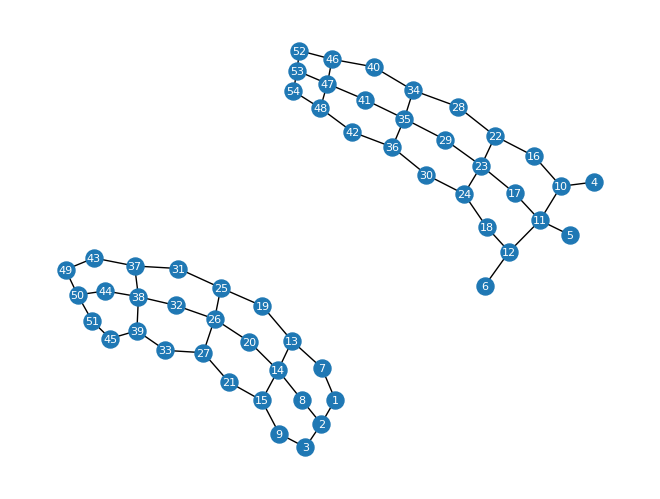

In [122]:
G_unweighted = nx.from_numpy_array(matrix)

label_dict = {label: f"{int(label)+1}" for label in G_unweighted.nodes}


pos = nx.spring_layout(G_unweighted, seed=25)

nx.draw(G_unweighted, pos=pos, font_color='white', node_size=150, font_size=8, labels=label_dict)

{0, 1, 2, 6, 7, 8, 12, 13, 14, 18, 19, 20, 24, 25, 26, 30, 31, 32, 36, 37, 38, 42, 43, 44, 48, 49, 50}
{3, 4, 5, 9, 10, 11, 15, 16, 17, 21, 22, 23, 27, 28, 29, 33, 34, 35, 39, 40, 41, 45, 46, 47, 51, 52, 53}


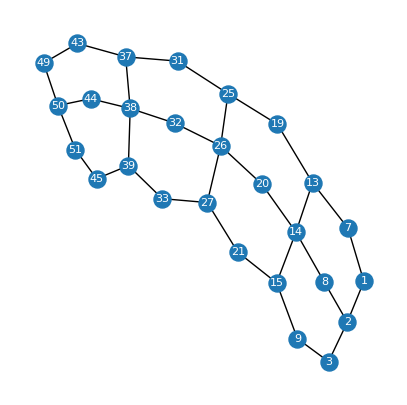

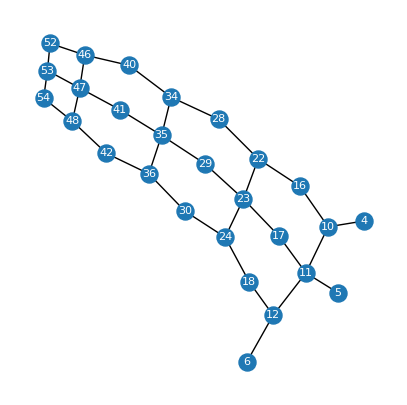

In [123]:
# Create graph from adjacency matrix

connected_components = list(nx.connected_components(G_unweighted))
for component in connected_components:
    # Set figure size and node size
    fig, ax = plt.subplots(figsize=(5, 5))
    print(component)
    # Draw the first connected component
    nx.draw(G_unweighted.subgraph(component), pos=pos, with_labels=True, labels=label_dict, font_color='white', node_size=150, font_size=8)


## Betweenness Centrality

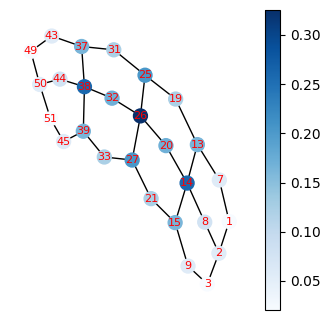

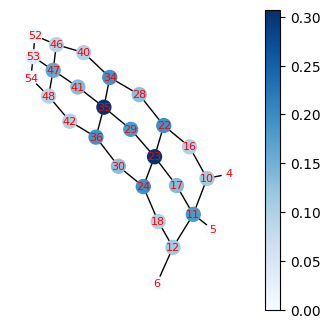

In [124]:
G = nx.from_numpy_array(matrix)

# Create a dictionary to map labels to their new labels
label_dict = {label: f"{int(label)+1}" for label in G.nodes}
connected_components = list(nx.connected_components(G))
betweenness_array = []
for component in connected_components:
    new_dict = {}
    for node in component:
        if node not in new_dict:
            new_dict[node] = label_dict.get(node)
    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G.subgraph(component))
    betweenness_array.append(betweenness_centrality)
    # Define a custom colormap that goes from blue to red
    cmap = plt.cm.Blues
    plt.figure(figsize=(3, 3))
    # Create a normalizer to map the betweenness centrality values to the range [0, 1]
    norm = colors.Normalize(vmin=min(betweenness_centrality.values()), vmax=max(betweenness_centrality.values()))

    # Map the betweenness centrality values to the range [0, 1] and use the colormap to set the node colors
    node_colors = [cmap(norm(c)) for c in betweenness_centrality.values()]

    # Draw the graph with node colors and labels
#     pos = nx.spring_layout(G.subgraph(component), seed=25)  # assuming spring layout for node positions
    nx.draw(G.subgraph(component), node_color=node_colors, cmap=cmap, font_color='red', node_size=100, font_size=8, labels=new_dict, pos=pos)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    plt.show()
# Create the colorbar
# print(n)

# Show the plot


In [125]:
# Print results for all nodes
i = 1
for component in betweenness_array:
    print("Component", i)
    for station, centrality in component.items():
        print(f"Station {station+1}: {centrality}")
    i += 1
# print(n)

Component 1
Station 1: 0.02041025641025641
Station 2: 0.0558974358974359
Station 3: 0.02041025641025641
Station 7: 0.05784615384615384
Station 8: 0.07815384615384613
Station 9: 0.05784615384615384
Station 13: 0.16225641025641022
Station 14: 0.25887179487179485
Station 15: 0.16225641025641024
Station 19: 0.12266666666666665
Station 20: 0.17005128205128203
Station 21: 0.12266666666666665
Station 25: 0.20492307692307687
Station 26: 0.3253333333333333
Station 27: 0.20492307692307687
Station 31: 0.12266666666666667
Station 32: 0.17005128205128206
Station 33: 0.12266666666666667
Station 37: 0.16225641025641027
Station 38: 0.25887179487179485
Station 39: 0.16225641025641027
Station 43: 0.05784615384615384
Station 44: 0.07815384615384614
Station 45: 0.05784615384615384
Station 49: 0.02041025641025641
Station 50: 0.05589743589743589
Station 51: 0.02041025641025641
Component 2
Station 4: 0.0
Station 5: 0.0
Station 6: 0.0
Station 10: 0.11251282051282051
Station 11: 0.18225641025641023
Station 12:

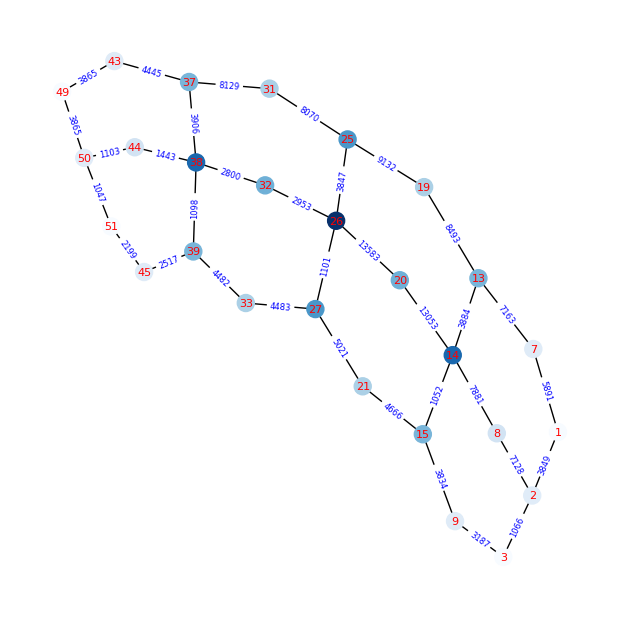

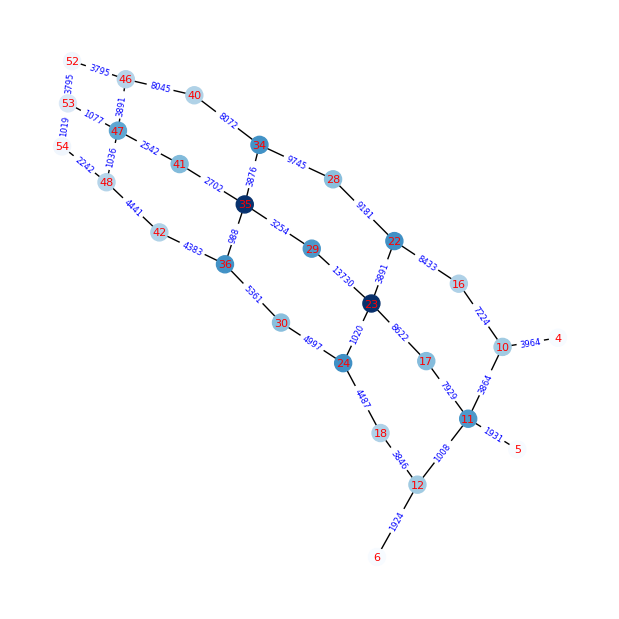

'\nroute_counts = Counter(df[\'stations_visited\'])\nprint(route_counts)\n\n# Create an empty weighted graph\nG = nx.Graph()\n\n# Add nodes to the graph for each unique station in the \'Route\' column\nstations = set(station for route in df[\'stations_visited\'] for station in route)\nG.add_nodes_from(stations)\n\n# Add weighted edges to the graph for each unique route in the \'Route\' column\nfor route, count in route_counts.items():\n    for i in range(len(route)-1):\n        G.add_edge(route[i], route[i+1], weight=count)\n\n        \n        \n# Set figure size and node size\nfig, ax = plt.subplots(figsize=(10, 10))\nnode_size = 100\npos = nx.spring_layout(G, k=0.1, scale=4)\n\n# Set node colors and edge style\nnode_color = \'lightblue\'\nedge_style = {\'width\': 1}\n\n# Draw graph\nlabel_dict = {label: f"{int(label)}" for label in G.nodes}\nnx.draw(G, pos,labels=label_dict, node_color=node_color, node_size=node_size, edge_color=\'grey\', **edge_style)\n\nnx.draw_networkx_edge_label

In [127]:
from collections import Counter

# ##THIS IS THE ONE
# # Define a lambda function to extract the stations visited in a list
def extract_stations(row):
    stations = []
    for i in range(1, 20):
        if pd.isna(row[i]):  # Check if the column is null
            break  # End of journey, exit the loop
        else:
            stations.append(row[i])  # Add the station to the list
    return tuple(stations)

# Apply the lambda function to create a new column 'Stations'
df['stations_visited'] = df.apply(lambda row: extract_stations(row), axis=1)


'''
# Get a dictionary of station pairs and their respective commuter counts
route_counts = {}
for route in df['stations_visited']:
    for i in range(len(route)-1):
        station_pair = tuple(sorted([route[i], route[i+1]]))
        if station_pair in route_counts:
            route_counts[station_pair] += 1
        else:
            route_counts[station_pair] = 1


# Create a weighted graph using the station pairs and their respective commuter counts -- WROng
G = nx.Graph()
for station_pair, count in route_counts.items():
    G.add_edge(station_pair[0], station_pair[1], weight=count)
'''

G_weighted = nx.from_numpy_array(matrix1)

# print(n)
# Create a dictionary to map labels to their new labels
label_dict = {label: f"{int(label)+1}" for label in G.nodes}
connected_components = list(nx.connected_components(G))
betweenness_array = []
for component in connected_components:
    new_dict = {}
    for node in component:
        if node not in new_dict:
            new_dict[node] = label_dict.get(node)
    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G.subgraph(component))
    betweenness_array.append(betweenness_centrality)
    # Define a custom colormap that goes from blue to red
    cmap = plt.cm.Blues
    plt.figure(figsize=(6, 6))

    # Create a normalizer to map the betweenness centrality values to the range [0, 1]
    norm = colors.Normalize(vmin=min(betweenness_centrality.values()), vmax=max(betweenness_centrality.values()))

    # Map the betweenness centrality values to the range [0, 1] and use the colormap to set the node colors
    node_colors = [cmap(norm(c)) for c in betweenness_centrality.values()]
    edge_labels = nx.get_edge_attributes(G_weighted.subgraph(component), 'weight')
    # Draw the graph with node colors and labels
#     pos = nx.spring_layout(G.subgraph(component), seed=25)  # assuming spring layout for node positions
    nx.draw(G.subgraph(component), node_color=node_colors, cmap=cmap, font_color='red', 
            node_size=150, font_size=8, labels=new_dict, pos=pos)
    nx.draw_networkx_edge_labels(G.subgraph(component), pos, edge_labels=edge_labels, font_color='blue', font_size=6)  # Draw the edge labels
#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([])
#     cbar = plt.colorbar(sm)
    plt.show()



# G = nx.from_numpy_array(matrix1)
# G_unweight = nx.from_numpy_array(matrix)
# fig, ax = plt.subplots(figsize=(10, 10))
# #pos = nx.spring_layout(G, scale=10000)
# # pos = nx.spring_layout(G_unweight, seed=25)  # Set the positions of nodes for plotting
# nx.draw(G_unweight, pos=pos, labels=label_dict, font_size=8, node_size=150, font_color='white')  # Draw the graph

# nx.draw_networkx_edge_labels(G_unweight, pos, edge_labels=edge_labels, font_color='red', font_size=6)  # Draw the edge labels
# plt.show()


'''
route_counts = Counter(df['stations_visited'])
print(route_counts)

# Create an empty weighted graph
G = nx.Graph()

# Add nodes to the graph for each unique station in the 'Route' column
stations = set(station for route in df['stations_visited'] for station in route)
G.add_nodes_from(stations)

# Add weighted edges to the graph for each unique route in the 'Route' column
for route, count in route_counts.items():
    for i in range(len(route)-1):
        G.add_edge(route[i], route[i+1], weight=count)

        
        
# Set figure size and node size
fig, ax = plt.subplots(figsize=(10, 10))
node_size = 100
pos = nx.spring_layout(G, k=0.1, scale=4)

# Set node colors and edge style
node_color = 'lightblue'
edge_style = {'width': 1}

# Draw graph
label_dict = {label: f"{int(label)}" for label in G.nodes}
nx.draw(G, pos,labels=label_dict, node_color=node_color, node_size=node_size, edge_color='grey', **edge_style)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
'''

Betweenness Centrality for each component

In [128]:
betweenness_array

[{0: 0.02041025641025641,
  1: 0.0558974358974359,
  2: 0.02041025641025641,
  6: 0.05784615384615384,
  7: 0.07815384615384613,
  8: 0.05784615384615384,
  12: 0.16225641025641022,
  13: 0.25887179487179485,
  14: 0.16225641025641024,
  18: 0.12266666666666665,
  19: 0.17005128205128203,
  20: 0.12266666666666665,
  24: 0.20492307692307687,
  25: 0.3253333333333333,
  26: 0.20492307692307687,
  30: 0.12266666666666667,
  31: 0.17005128205128206,
  32: 0.12266666666666667,
  36: 0.16225641025641027,
  37: 0.25887179487179485,
  38: 0.16225641025641027,
  42: 0.05784615384615384,
  43: 0.07815384615384614,
  44: 0.05784615384615384,
  48: 0.02041025641025641,
  49: 0.05589743589743589,
  50: 0.02041025641025641},
 {3: 0.0,
  4: 0.0,
  5: 0.0,
  9: 0.11251282051282051,
  10: 0.18225641025641023,
  11: 0.11251282051282051,
  15: 0.09907692307692309,
  16: 0.13415384615384612,
  17: 0.09907692307692309,
  21: 0.19425641025641024,
  22: 0.3074871794871794,
  23: 0.19425641025641024,
  27: 0

The code below may form different results from the one in the report

Found 7 communities.


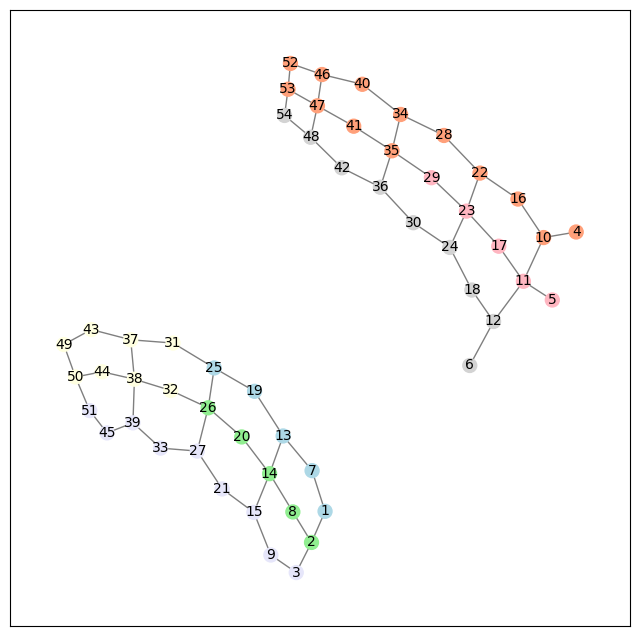

54


In [129]:
import community

G_unweight = nx.from_numpy_array(matrix)

partition = community.best_partition(G_weighted)


'''
# Draw the graph with nodes colored by community
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos ,node_size=40, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
'''


# Print the number of communities found
print(f"Found {len(set(partition.values()))} communities.")

# Create a dictionary where the keys are community ids and the values are lists of nodes in that community
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)
    
comm_colors = {
    0: "lightblue",
    1: "lightgreen",
    2: "lavender",
    3: "lightyellow",
    4: "lightpink",
    5: "lightgrey",
    6: "lightsalmon",
    7: "lightcyan"
}
'''
# Print the list of stations in each community
for community_id, nodes in communities.items():
    print(f"Community {community_id}:")
    for node in nodes:
        print(int(node))
    print("\n")
'''

# Draw the graph with nodes colored by community and labeled with the station name
fig, ax = plt.subplots(figsize=(8, 8))
# pos = nx.spring_layout(G, seed = 25)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=[comm_colors[partition[n]] for n in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=label_dict, font_size=10)

plt.show()
print(n)

In [130]:
line_edges = {}
for edge in G.edges():
    # Get the community ID for each node in the edge
    u_community = partition[edge[0]]
    v_community = partition[edge[1]]
    
    # If the nodes are in the same community, add the edge to the line
    if u_community == v_community:
        line_id = u_community
        
        # If the line doesn't exist yet, create it
        if line_id not in line_edges:
            line_edges[line_id] = []
        
        line_edges[line_id].append(edge)

# Iterate over the lines and determine whether each edge is directed or undirected
for line_id, edges in line_edges.items():
    directed_count = 0
    undirected_count = 0
    
    for edge in edges:
        if G.has_edge(edge[1], edge[0]):
            # The edge is undirected
            undirected_count += 1
        else:
            # The edge is directed
            directed_count += 1
    
    print(f"Line {line_id}:")
    print(f"\tDirected edges: {directed_count}")
    print(f"\tUndirected edges: {undirected_count}")
    
    if directed_count > 0:
        print("\tTravel direction: Based on edge orientation")
    else:
        print("\tTravel direction: Bidirectional")
print(n)

Line 0:
	Directed edges: 0
	Undirected edges: 4
	Travel direction: Bidirectional
Line 1:
	Directed edges: 0
	Undirected edges: 4
	Travel direction: Bidirectional
Line 2:
	Directed edges: 0
	Undirected edges: 8
	Travel direction: Bidirectional
Line 6:
	Directed edges: 0
	Undirected edges: 14
	Travel direction: Bidirectional
Line 4:
	Directed edges: 0
	Undirected edges: 4
	Travel direction: Bidirectional
Line 5:
	Directed edges: 0
	Undirected edges: 8
	Travel direction: Bidirectional
Line 3:
	Directed edges: 0
	Undirected edges: 8
	Travel direction: Bidirectional
54


# Congestion

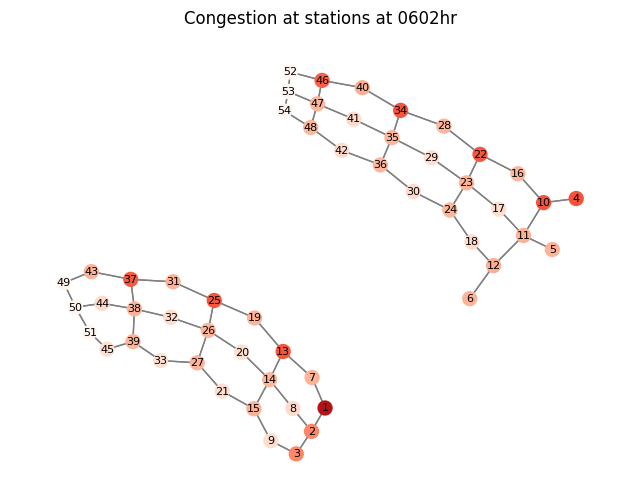

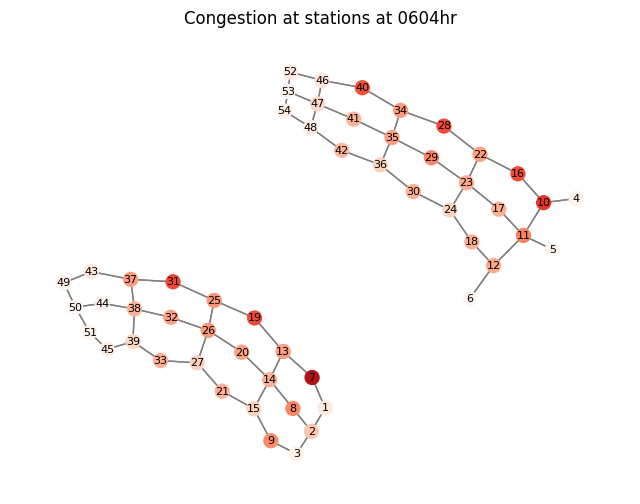

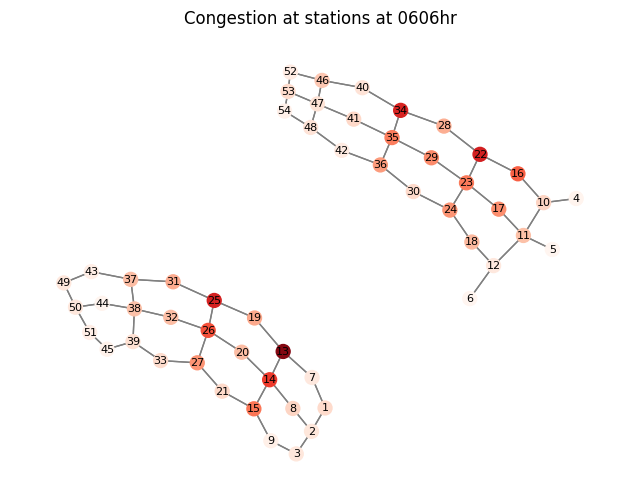

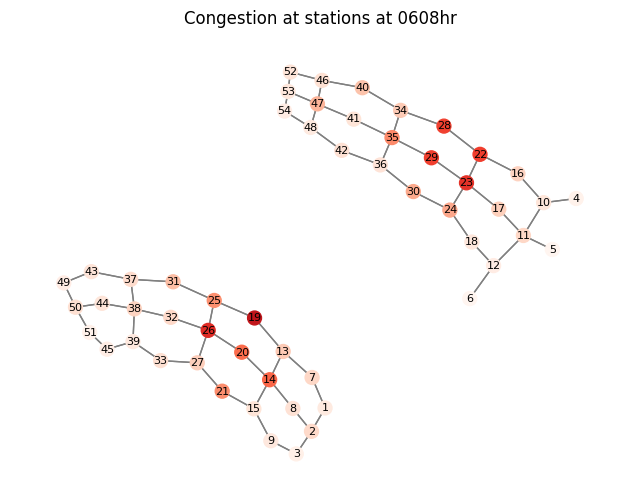

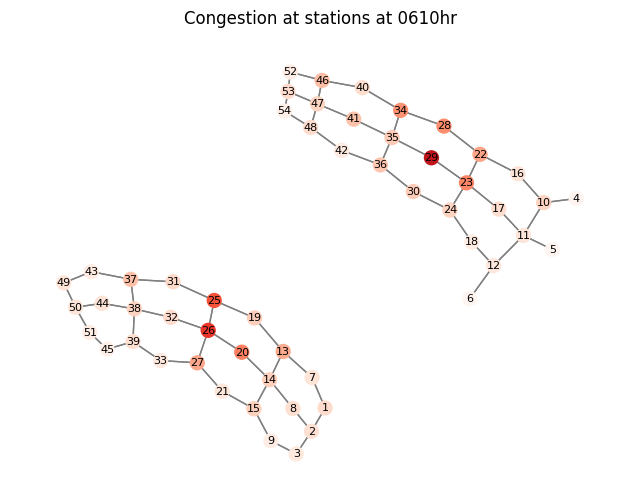

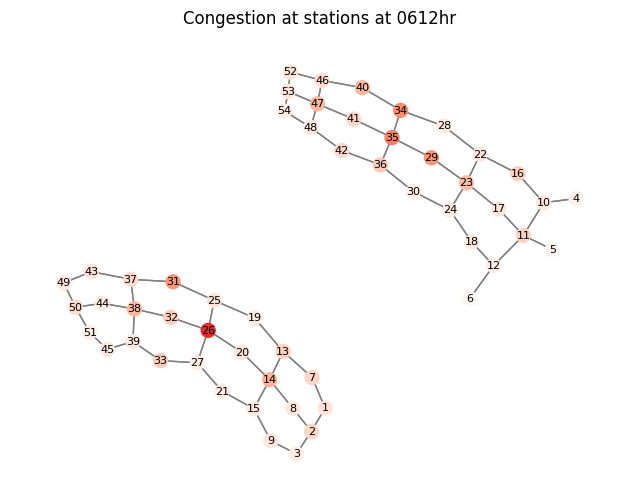

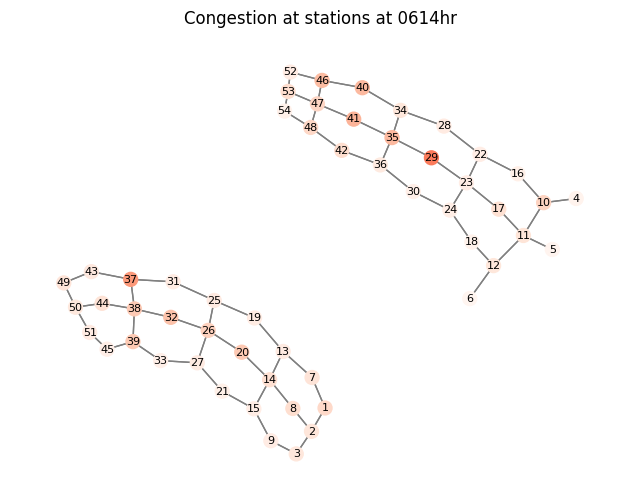

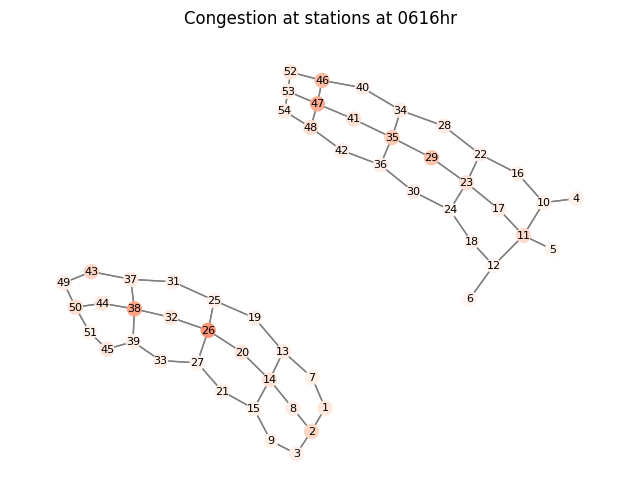

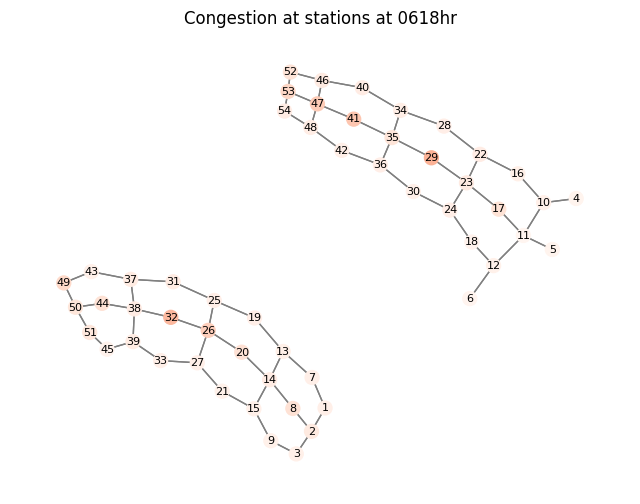

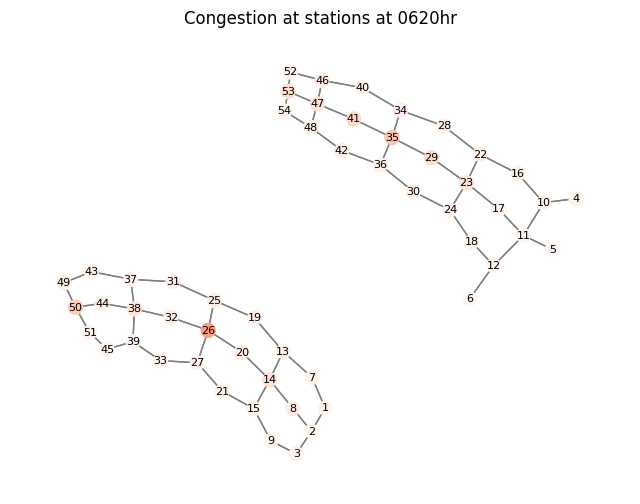

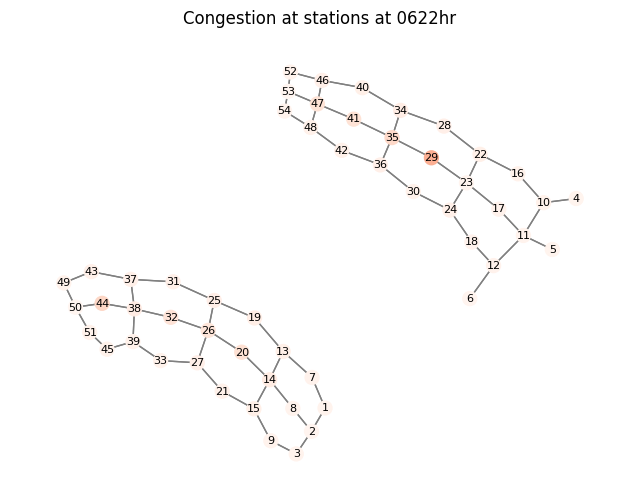

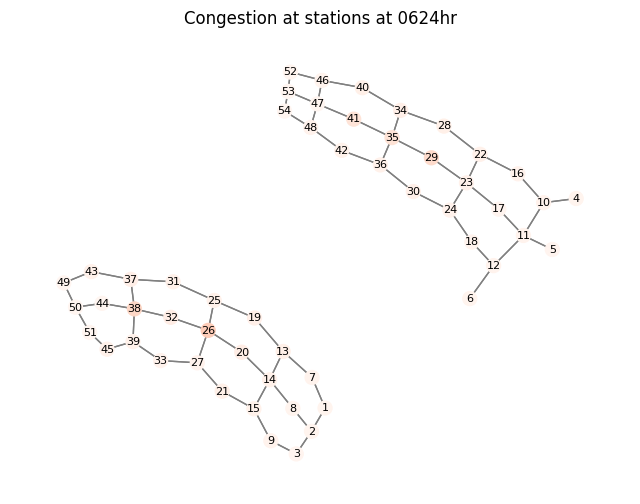

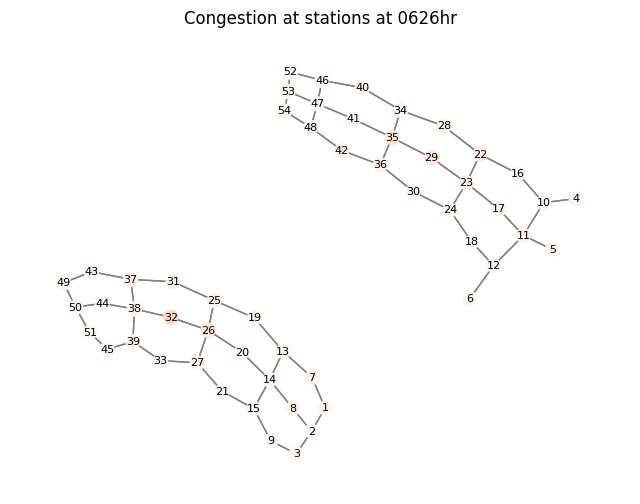

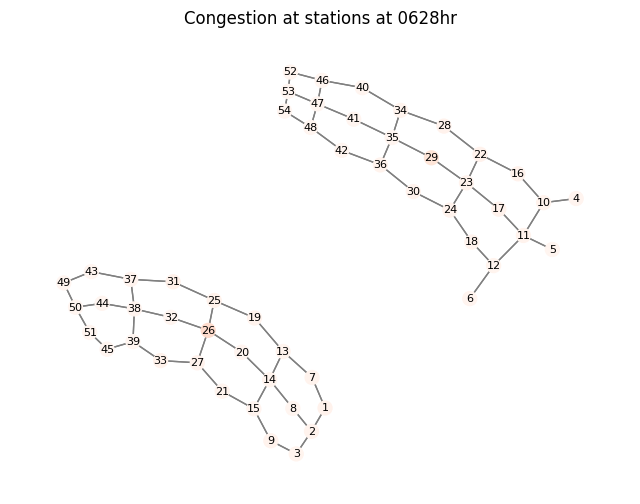

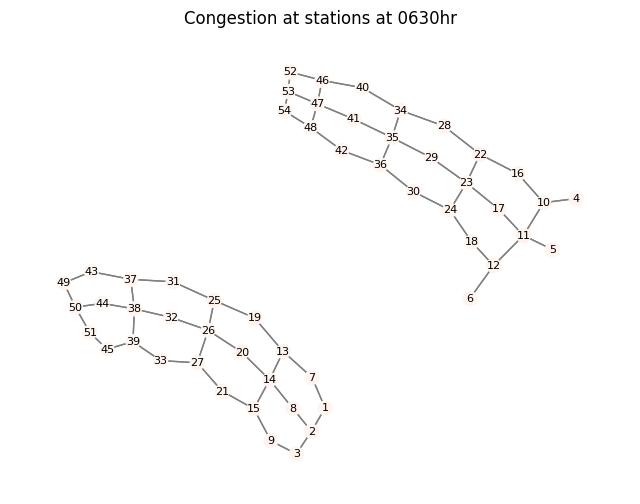

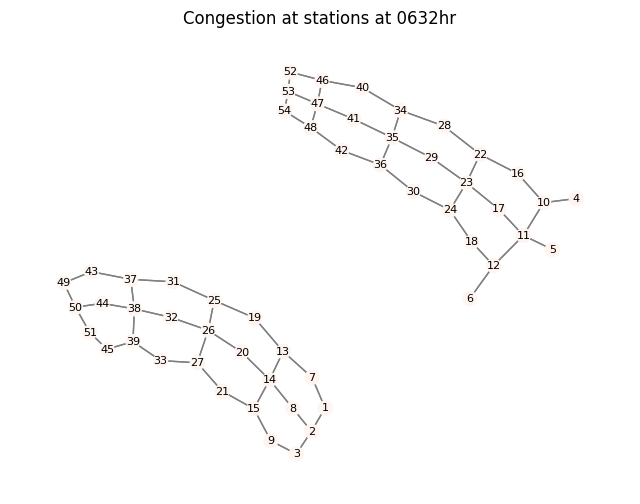

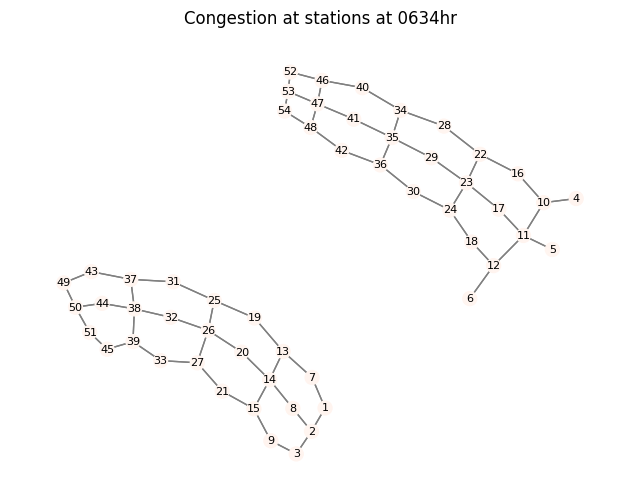

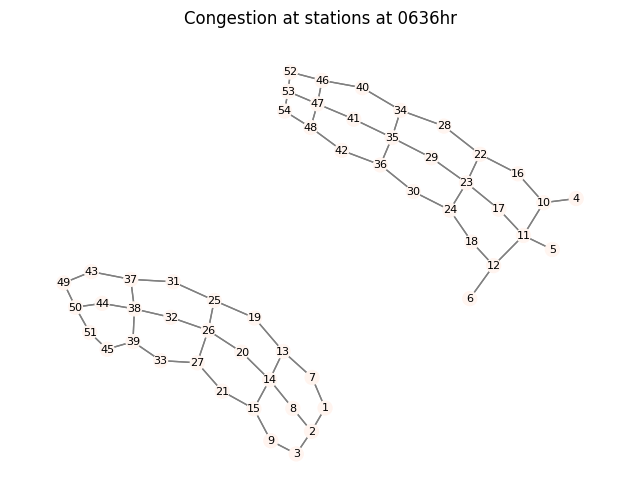

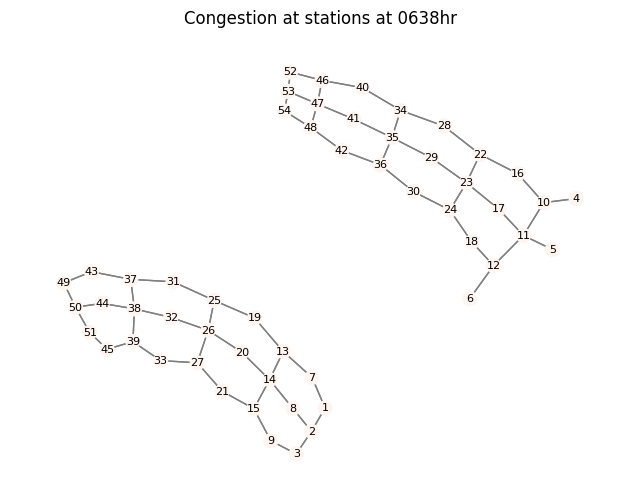

In [131]:
column_names = df.columns[1:20].tolist()
k = 0
for column in column_names:
    people_dict0602 = df[column].value_counts().to_dict()
    if 'nan' in people_dict0602.keys():
        people_dict0602.pop('nan')
    for i in range(1, len(matrix) + 1):
        if str(float(i)) not in people_dict0602:
            people_dict0602[str(float(i))] = 0

    G0602 = nx.DiGraph()

    people_dict0602 = {int(float(key)): value for key, value in people_dict0602.items()}
    people_dict0602 = dict(sorted(people_dict0602.items()))
    # Display the new dictionary with keys as integers

    for station, num_people in people_dict0602.items():
        G0602.add_node(station, size=num_people)  # Set the initial size based on number of people



    # Add edges from adjacency matrix
    for i in range(0,len(matrix)):
        for j in range(0, len(matrix[i])):
            if matrix[i][j] == 1:
                G0602.add_edge(int(float(list(people_dict0602.keys())[i])), int(float(list(people_dict0602.keys())[j])))

    # Extract node sizes from node attributes
    node_sizes = np.array([nx.get_node_attributes(G0602, 'size')[node] for node in G0602.nodes()])

    # Normalize node sizes for colormap
    node_sizes_norm = (node_sizes - np.min(node_sizes)) / (7000 - np.min(node_sizes))

    # Specify colormap
    cmap = plt.cm.get_cmap('Reds')

    # Assign positions to all nodes using spring_layout
    if k == 0:
        pos = nx.spring_layout(G0602, seed=25)

    # Draw the graph with nodes scaled based on initial number of people and colored based on node sizes
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G0602, pos, node_color=node_sizes_norm, cmap=cmap, vmin=0, vmax=1, node_size=100)
    nx.draw_networkx_edges(G0602, pos, edge_color='gray', arrows=False)
    nx.draw_networkx_labels(G0602, pos, font_size=8, font_color='black')
    plt.title("Congestion at stations at " + column)
    plt.axis('off')
    plt.show()
    k += 1




In [132]:
import ast 

def get_last_station(stations):
#     print(stations)
#     input_tuple = ast.literal_eval(stations)
    input_tuple = tuple(x for x in stations if x != 'nan')
    
    return int(float(input_tuple[-1]))

df['end-station'] = df['stations_visited'].apply(get_last_station)

In [133]:
df['end-station'].value_counts()

29    24996
26    24822
1      2837
25     1984
13     1973
34     1942
10     1926
22     1894
46     1891
4      1883
37     1854
3      1590
2      1522
14     1078
15     1055
47     1046
7      1038
11     1037
24     1036
6      1026
38     1024
39     1019
27     1018
36     1017
31     1016
5      1002
28     1002
43      994
35      992
12      989
19      987
40      979
23      975
48      964
16      899
45      582
8       555
32      528
20      526
17      525
41      515
33      508
42      508
44      498
21      498
9       494
30      485
18      471
Name: end-station, dtype: int64

In [134]:
politician_df = df[df['Occupation'] == 'politician']
worker_df = df[df['Occupation'] == 'worker']
student_df = df[df['Occupation'] == 'student']

print("Student End station")
print(student_df['end-station'].value_counts())

print("Worker End station")
print(worker_df['end-station'].value_counts())

print("Politician End station")
print(politician_df['end-station'].value_counts())
print(politician_df.shape)

Student End station
26    22306
Name: end-station, dtype: int64
Worker End station
26    2516
29    2492
1     2274
25    1595
13    1579
10    1561
34    1549
4     1519
46    1513
22    1496
37    1493
3     1253
2     1221
14     855
15     840
7      839
24     832
6      830
11     822
36     821
35     819
38     815
47     812
31     809
39     807
28     803
19     802
27     798
43     798
5      795
40     782
48     769
12     766
23     763
16     714
45     463
8      428
20     426
17     421
33     418
32     409
41     409
42     404
44     404
9      398
21     393
30     389
18     365
Name: end-station, dtype: int64
Politician End station
29    22504
1       563
22      398
13      394
34      393
25      389
46      378
10      365
4       364
37      361
3       337
2       301
47      234
12      223
14      223
27      220
15      215
11      215
39      212
23      212
38      209
31      207
5       207
24      204
7       199
28      199
40      197
43      19

In [135]:
student_dict = student_df['end-station'].value_counts().to_dict()
worker_dict = worker_df['end-station'].value_counts().to_dict()
poli_dict = politician_df['end-station'].value_counts().to_dict()

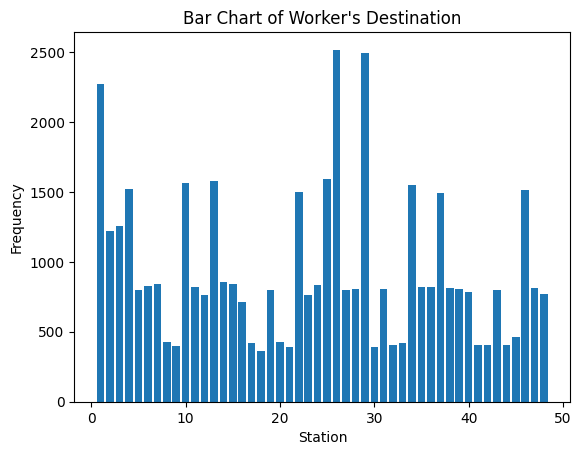

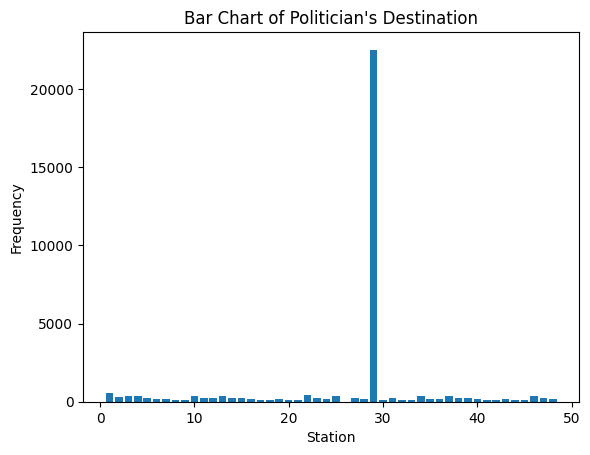

In [136]:
# Extract labels and values from the dictionary
labels = list(worker_dict.keys())
values = list(worker_dict.values())

# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.title("Bar Chart of Worker's Destination")

# Display the bar chart
plt.show()

# Extract labels and values from the dictionary
labels = list(poli_dict.keys())
values = list(poli_dict.values())

# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.title("Bar Chart of Politician's Destination")

# Display the bar chart
plt.show()

## Student Congestion

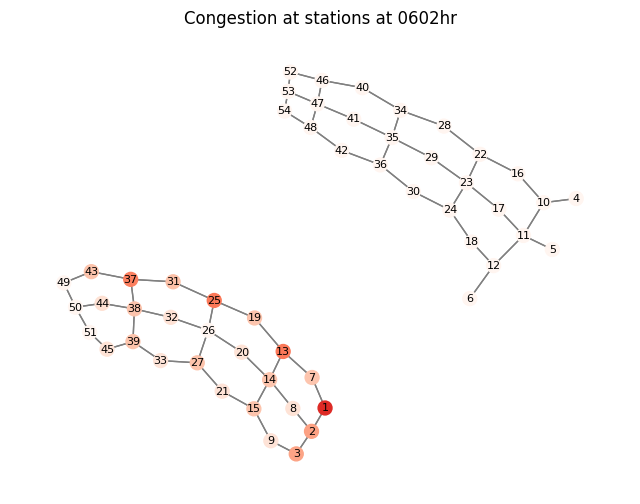

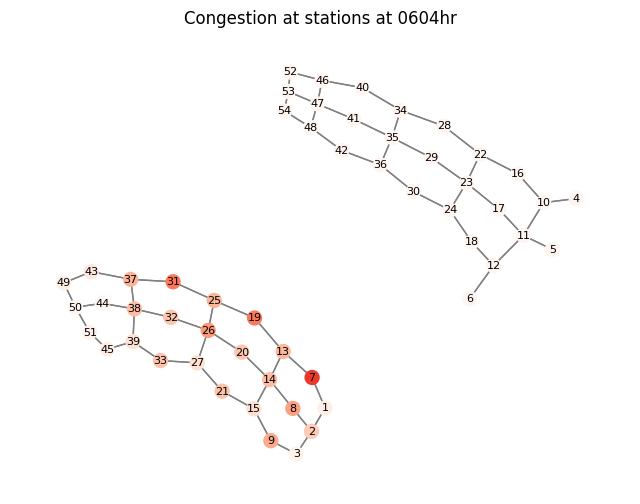

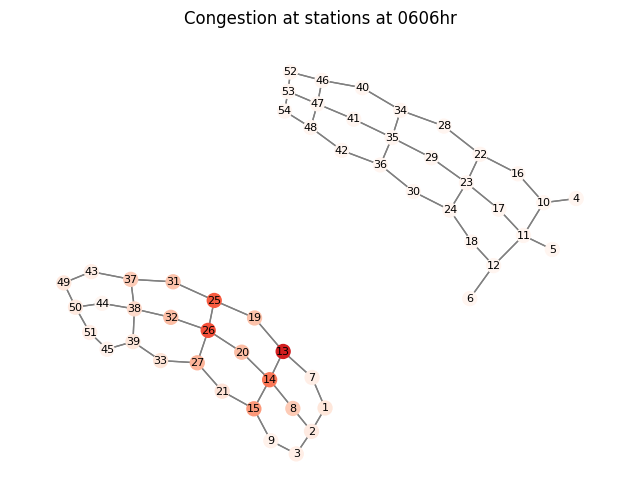

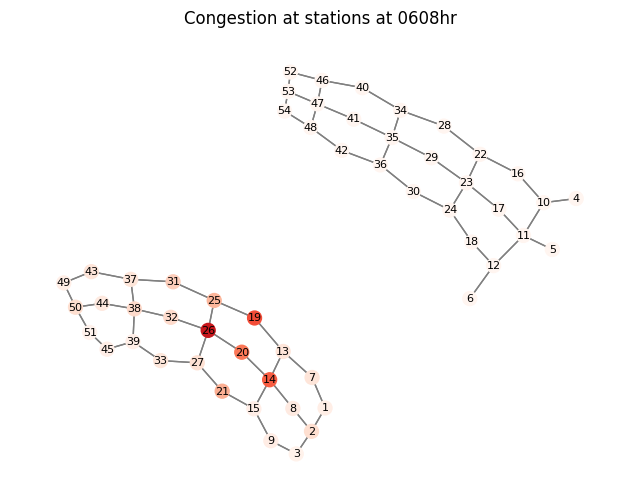

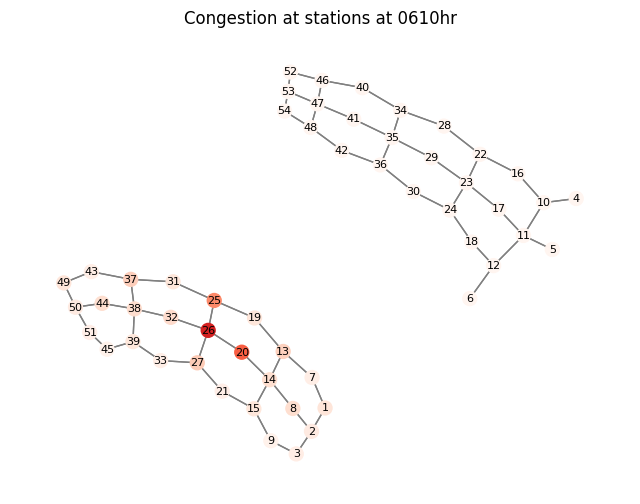

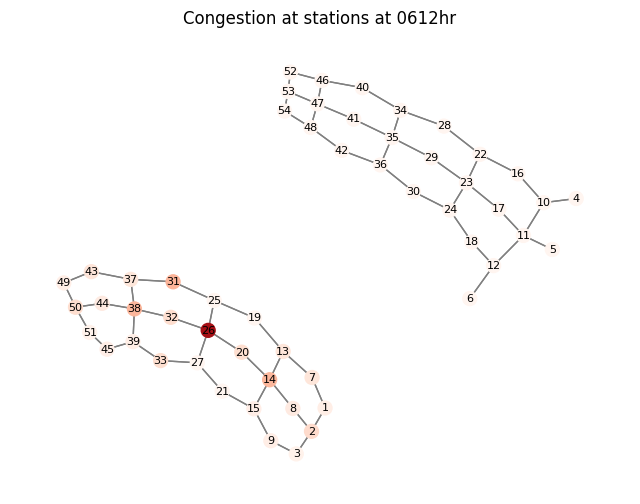

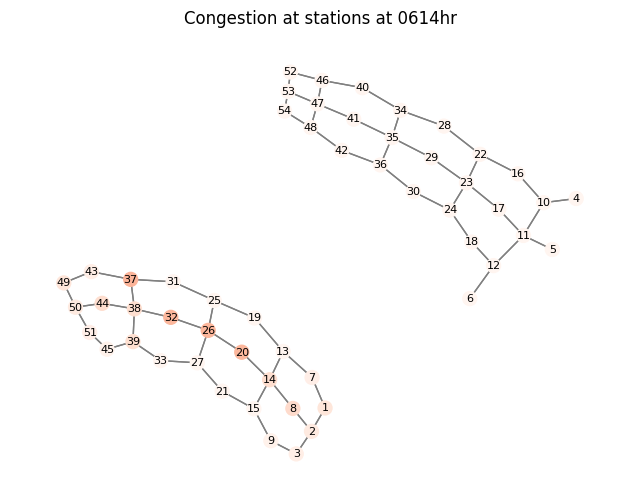

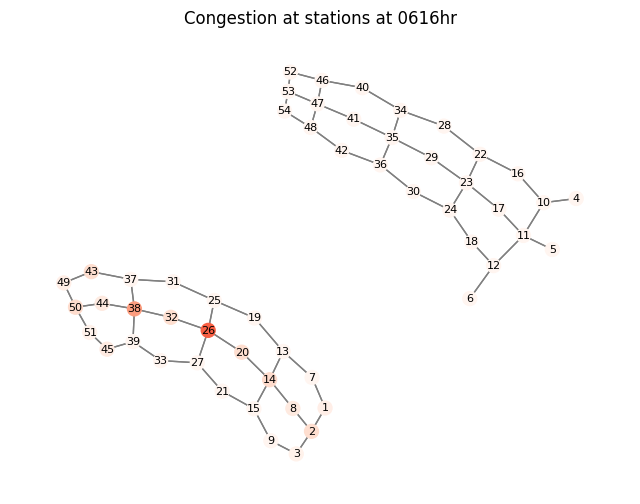

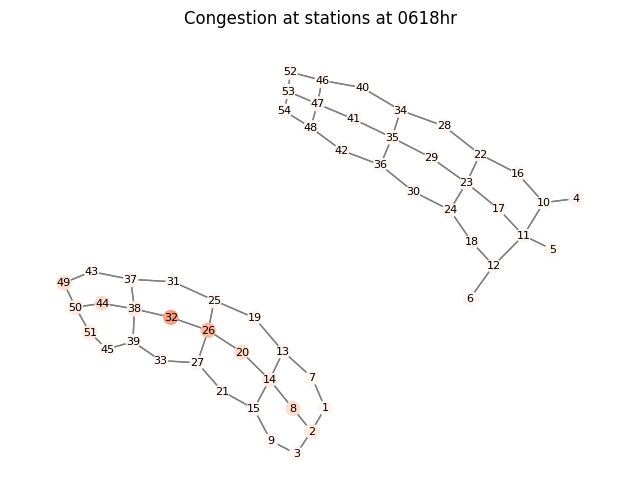

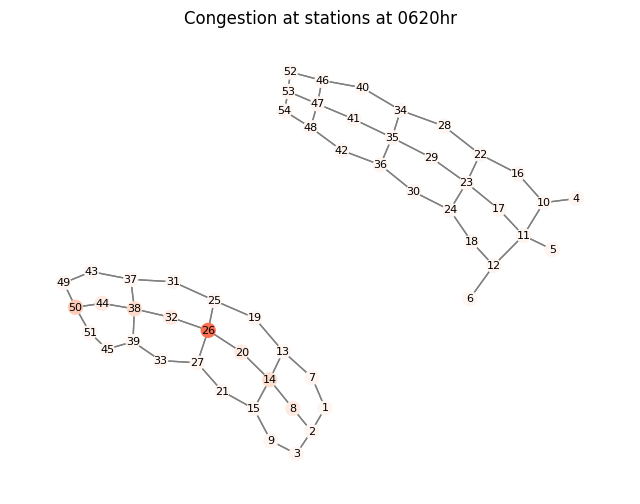

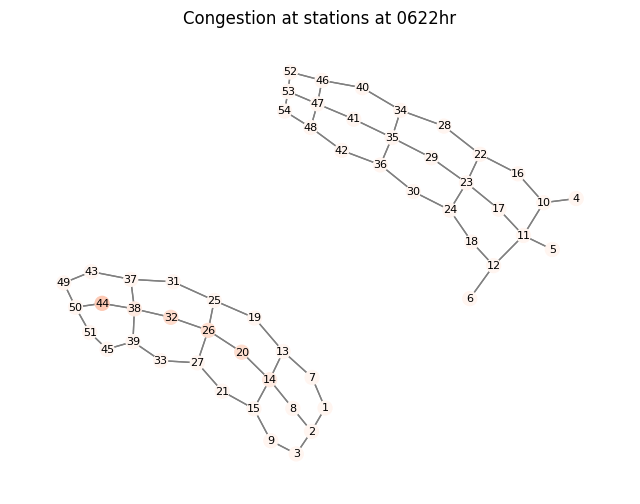

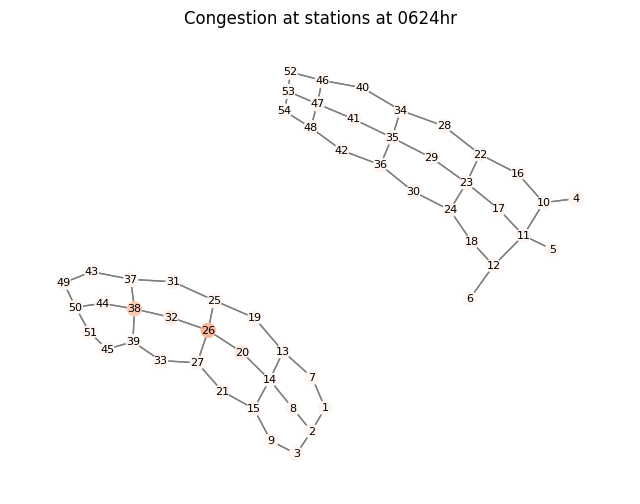

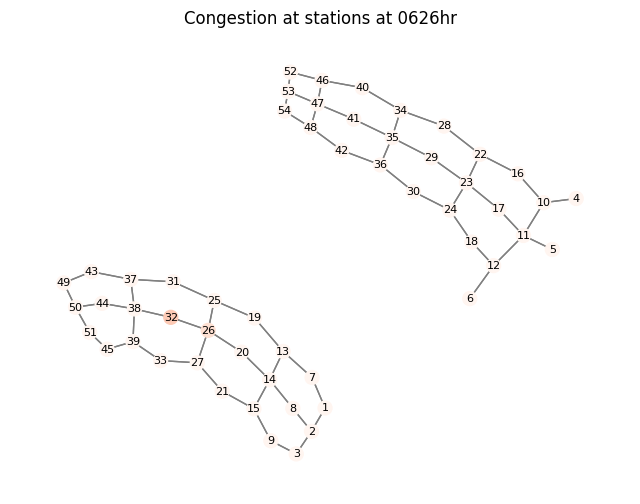

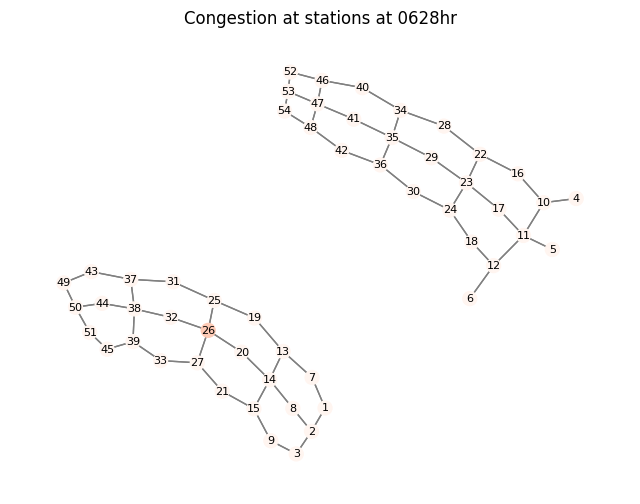

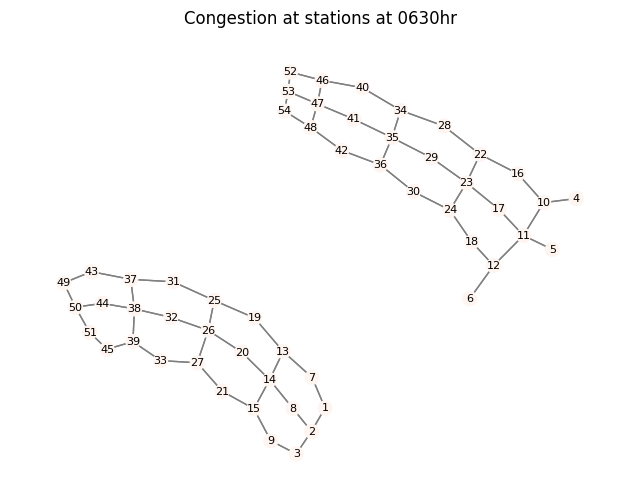

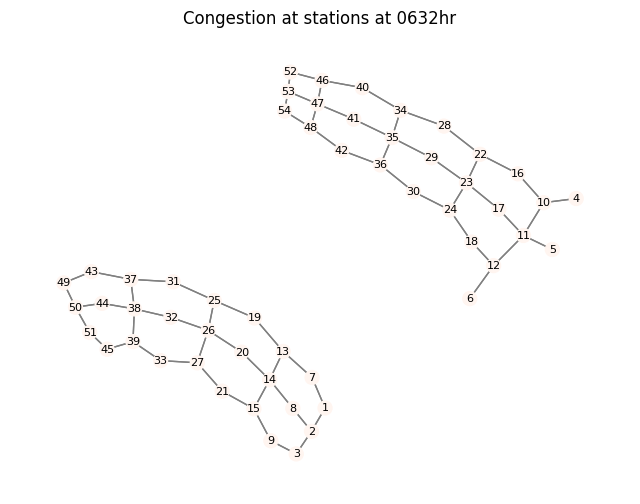

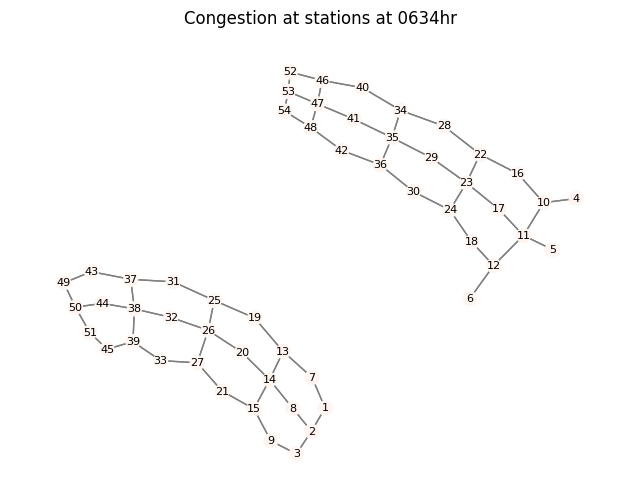

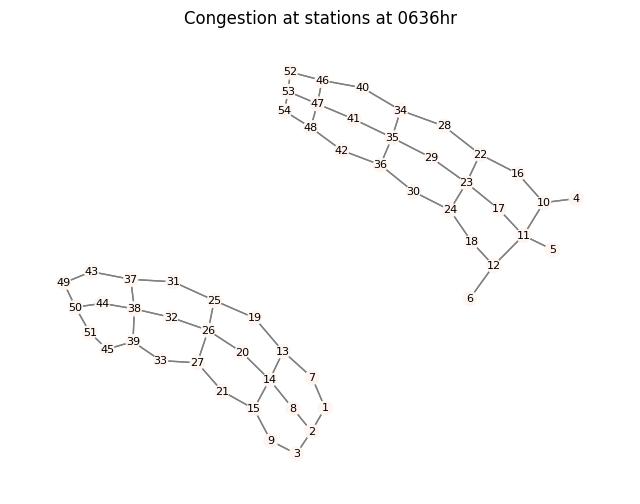

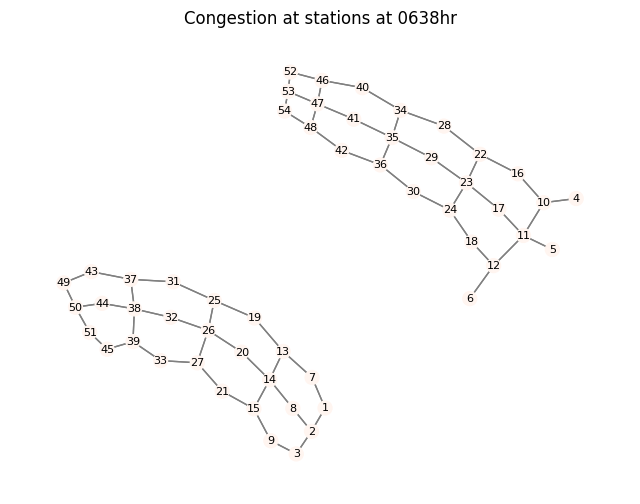

In [137]:
column_names = student_df.columns[1:20].tolist()
k = 0
for column in column_names:
    people_dict0602 = student_df[column].value_counts().to_dict()
    if 'nan' in people_dict0602.keys():
        people_dict0602.pop('nan')
    for i in range(1, len(matrix) + 1):
        if str(float(i)) not in people_dict0602:
            people_dict0602[str(float(i))] = 0

    G0602 = nx.DiGraph()

    people_dict0602 = {int(float(key)): value for key, value in people_dict0602.items()}
    people_dict0602 = dict(sorted(people_dict0602.items()))
    # Display the new dictionary with keys as integers

    for station, num_people in people_dict0602.items():
        G0602.add_node(station, size=num_people)  # Set the initial size based on number of people



    # Add edges from adjacency matrix
    for i in range(0,len(matrix)):
        for j in range(0, len(matrix[i])):
            if matrix[i][j] == 1:
                G0602.add_edge(int(float(list(people_dict0602.keys())[i])), int(float(list(people_dict0602.keys())[j])))

    # Extract node sizes from node attributes
    node_sizes = np.array([nx.get_node_attributes(G0602, 'size')[node] for node in G0602.nodes()])

    # Normalize node sizes for colormap
    node_sizes_norm = (node_sizes - np.min(node_sizes)) / (4000 - np.min(node_sizes))

    # Specify colormap
    cmap = plt.cm.get_cmap('Reds')

    # Assign positions to all nodes using spring_layout
    if k == 0:
        pos = nx.spring_layout(G0602, seed=25)

    # Draw the graph with nodes scaled based on initial number of people and colored based on node sizes
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G0602, pos, node_color=node_sizes_norm, cmap=cmap, vmin=0, vmax=1, node_size=100)
    nx.draw_networkx_edges(G0602, pos, edge_color='gray', arrows=False)
    nx.draw_networkx_labels(G0602, pos, font_size=8, font_color='black')
    plt.title("Congestion at stations at " + column)
    plt.axis('off')
    plt.show()
    k += 1




## Worker Congestion

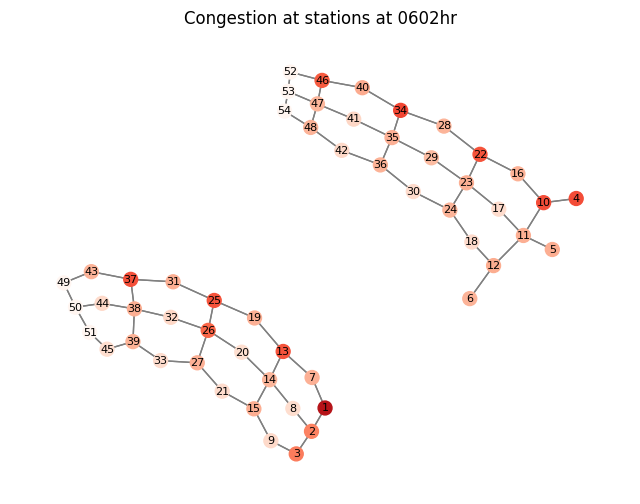

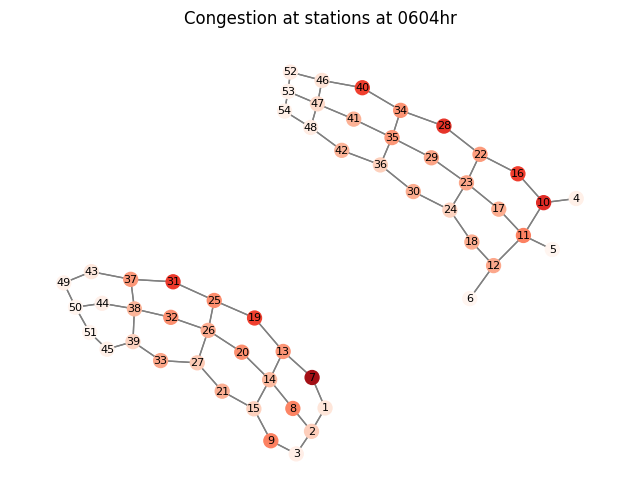

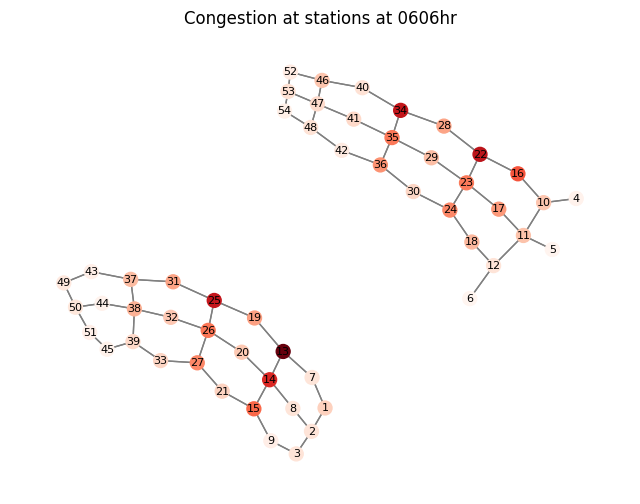

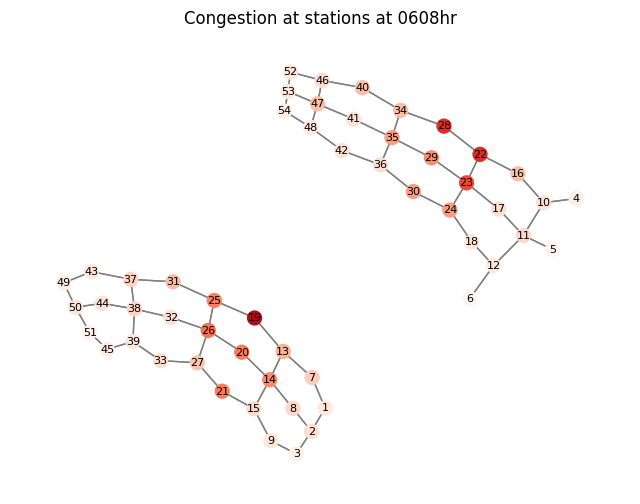

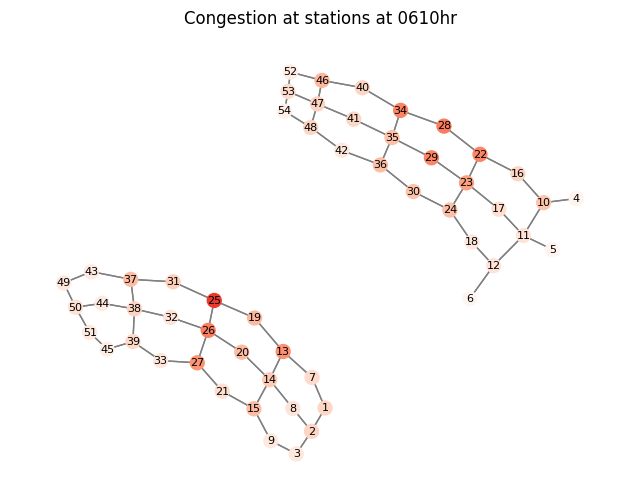

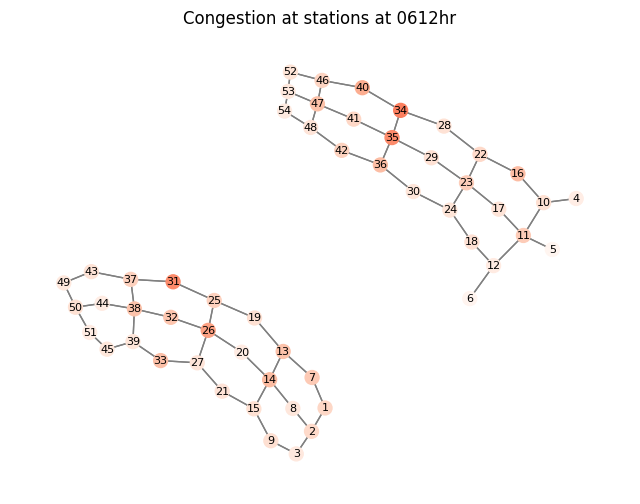

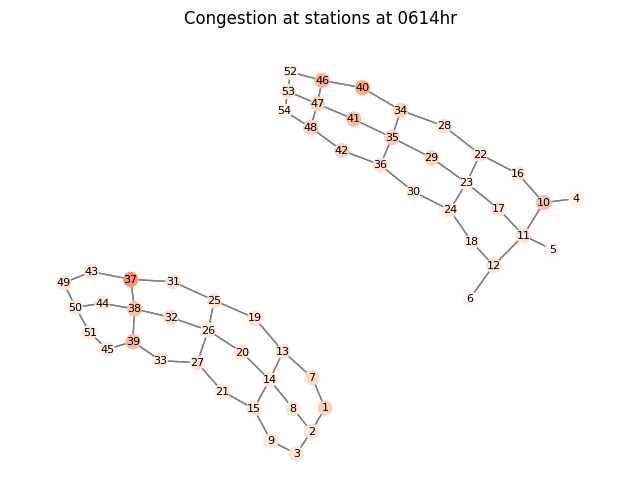

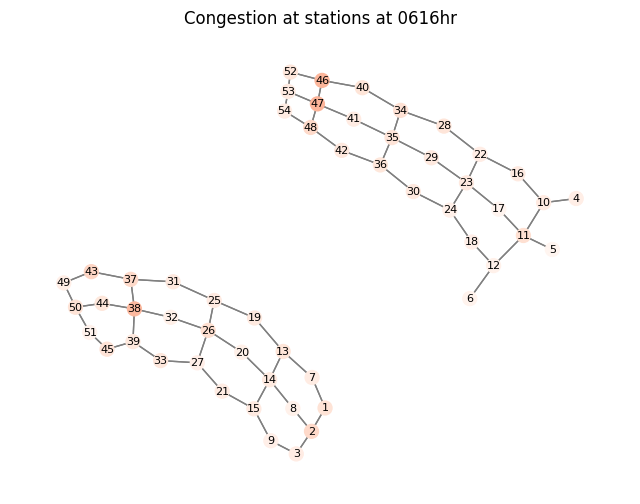

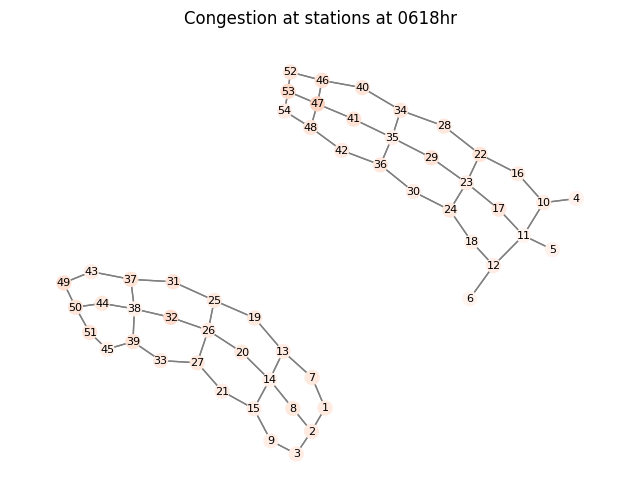

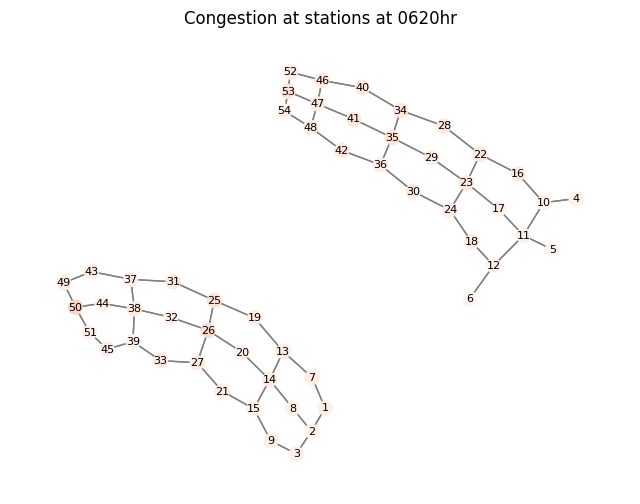

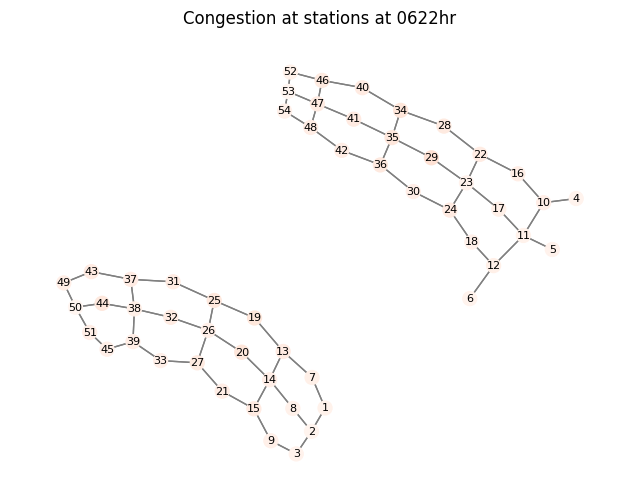

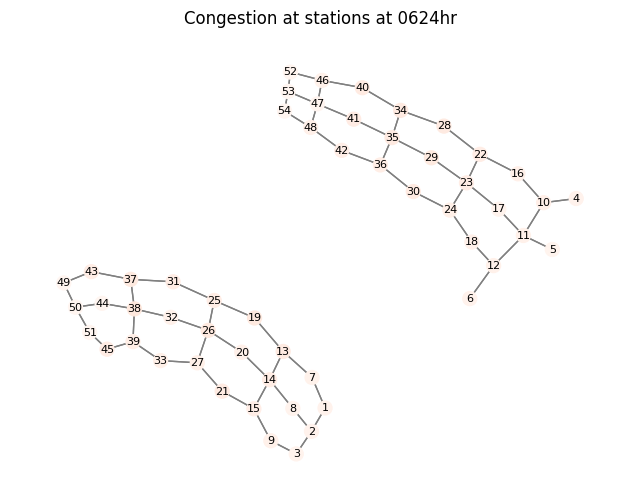

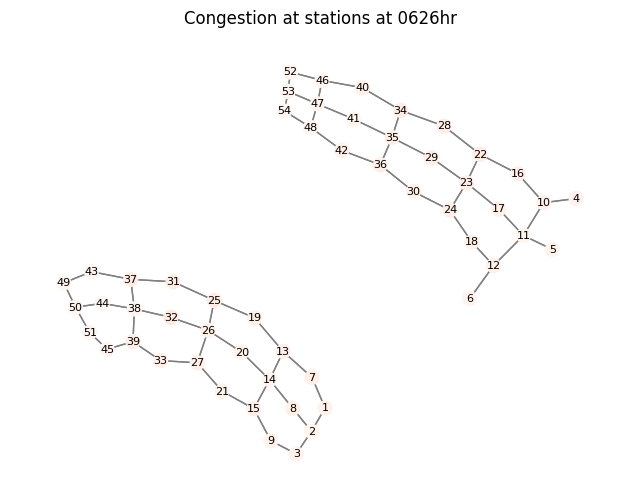

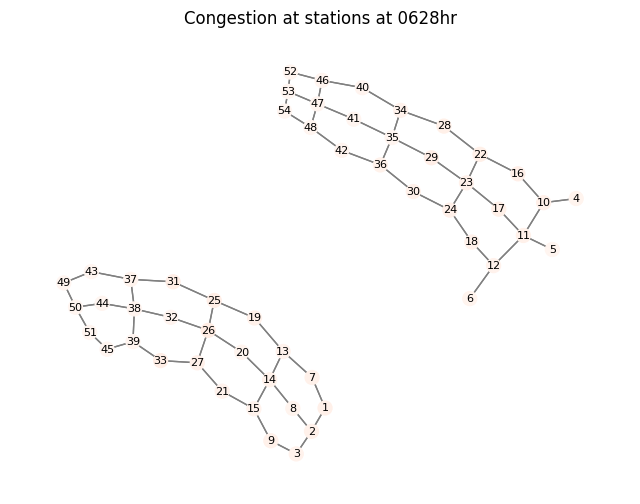

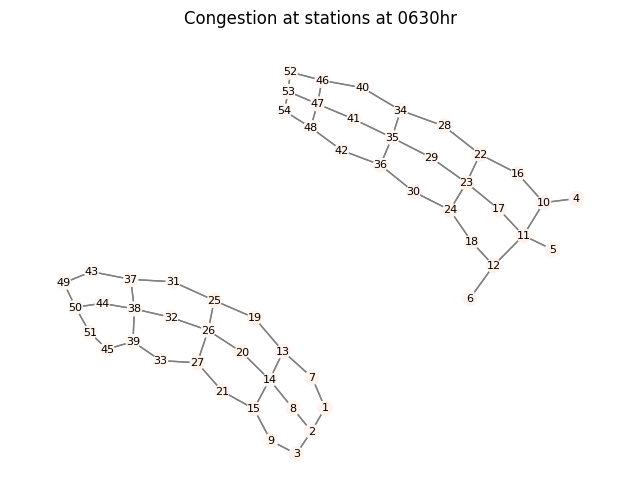

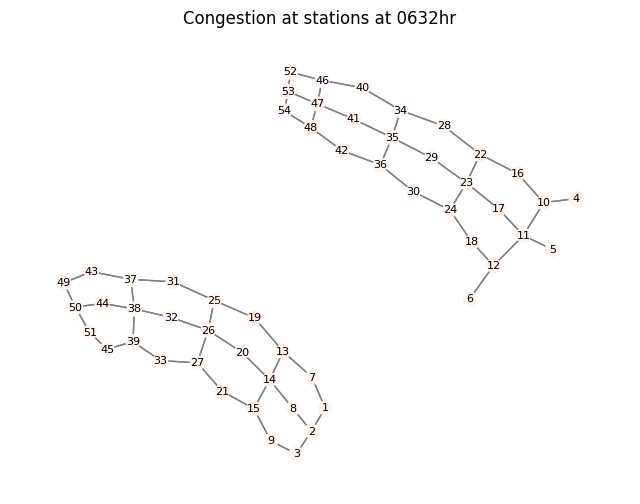

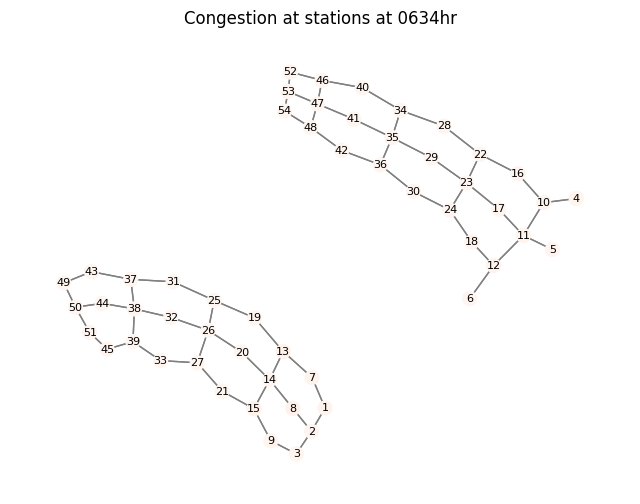

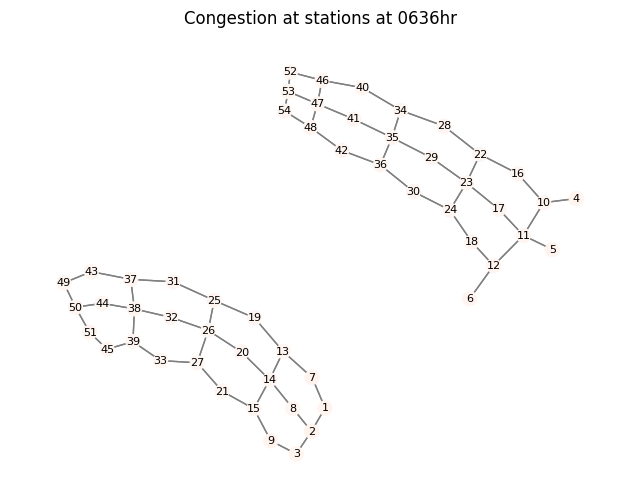

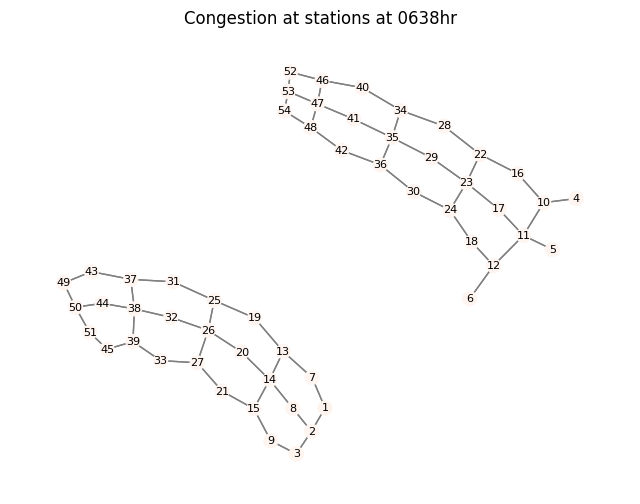

In [138]:
column_names = worker_df.columns[1:20].tolist()
k = 0
for column in column_names:
    people_dict0602 = worker_df[column].value_counts().to_dict()
    if 'nan' in people_dict0602.keys():
        people_dict0602.pop('nan')
    for i in range(1, len(matrix) + 1):
        if str(float(i)) not in people_dict0602:
            people_dict0602[str(float(i))] = 0

    G0602 = nx.DiGraph()

    people_dict0602 = {int(float(key)): value for key, value in people_dict0602.items()}
    people_dict0602 = dict(sorted(people_dict0602.items()))
    # Display the new dictionary with keys as integers

    for station, num_people in people_dict0602.items():
        G0602.add_node(station, size=num_people)  # Set the initial size based on number of people



    # Add edges from adjacency matrix
    for i in range(0,len(matrix)):
        for j in range(0, len(matrix[i])):
            if matrix[i][j] == 1:
                G0602.add_edge(int(float(list(people_dict0602.keys())[i])), int(float(list(people_dict0602.keys())[j])))

    # Extract node sizes from node attributes
    node_sizes = np.array([nx.get_node_attributes(G0602, 'size')[node] for node in G0602.nodes()])

    # Normalize node sizes for colormap
    node_sizes_norm = (node_sizes - np.min(node_sizes)) / (3000 - np.min(node_sizes))

    # Specify colormap
    cmap = plt.cm.get_cmap('Reds')

    # Assign positions to all nodes using spring_layout
    if k == 0:
        pos = nx.spring_layout(G0602, seed=25)

    # Draw the graph with nodes scaled based on initial number of people and colored based on node sizes
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G0602, pos, node_color=node_sizes_norm, cmap=cmap, vmin=0, vmax=1, node_size=100)
    nx.draw_networkx_edges(G0602, pos, edge_color='gray', arrows=False)
    nx.draw_networkx_labels(G0602, pos, font_size=8, font_color='black')
    plt.title("Congestion at stations at " + column)
    plt.axis('off')
    plt.show()
    k += 1




## Politician Congestion

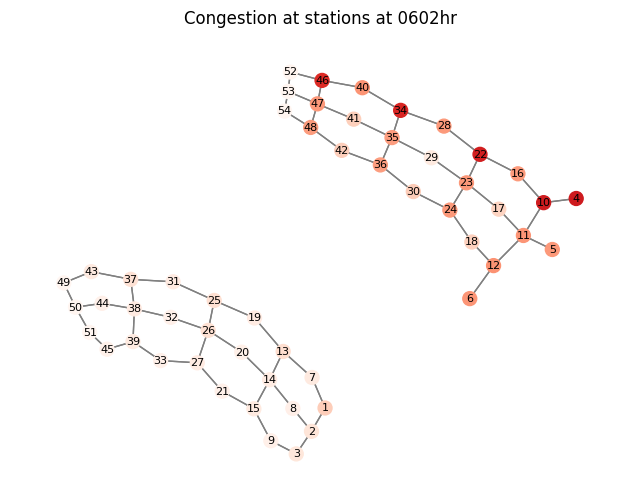

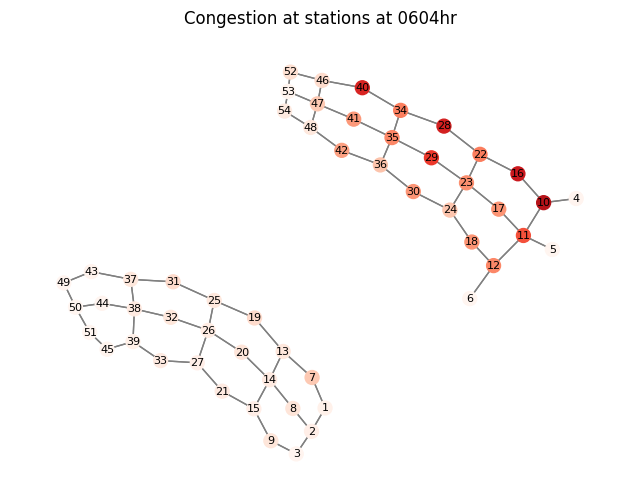

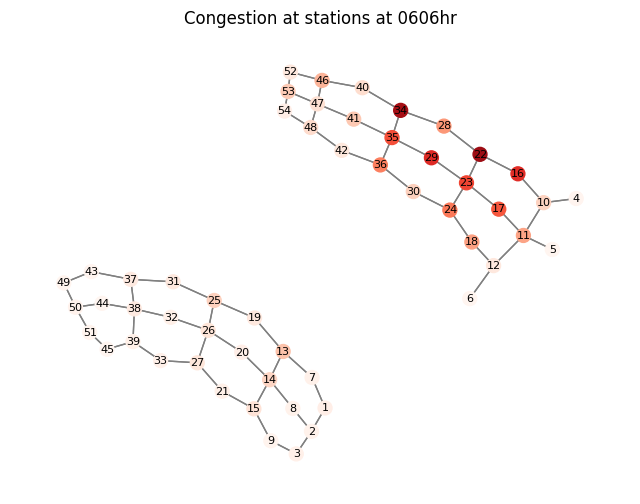

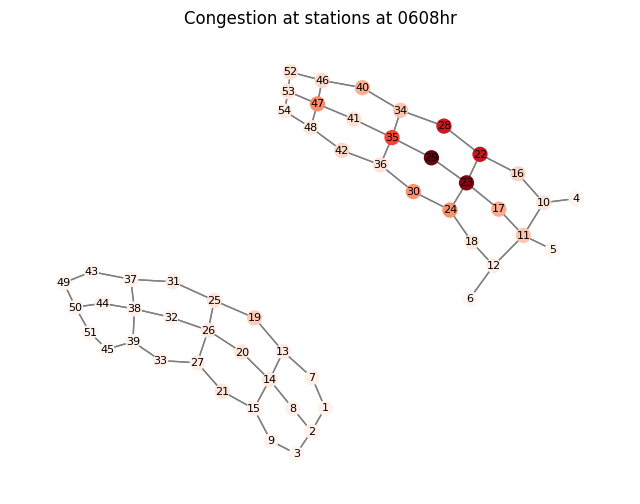

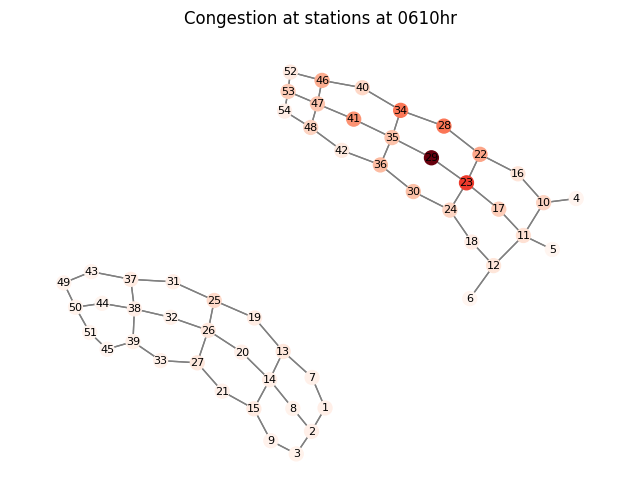

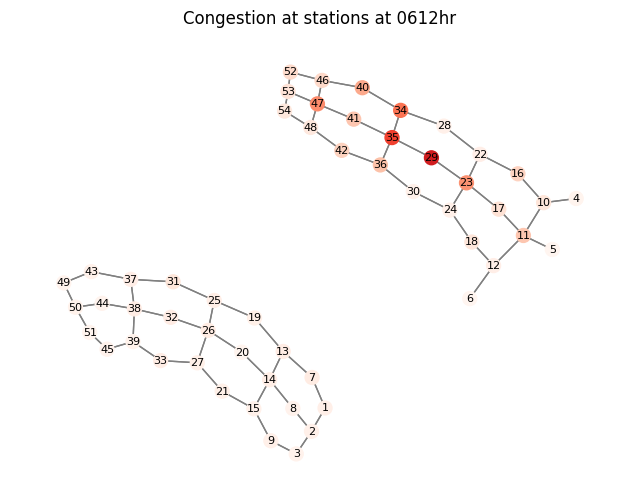

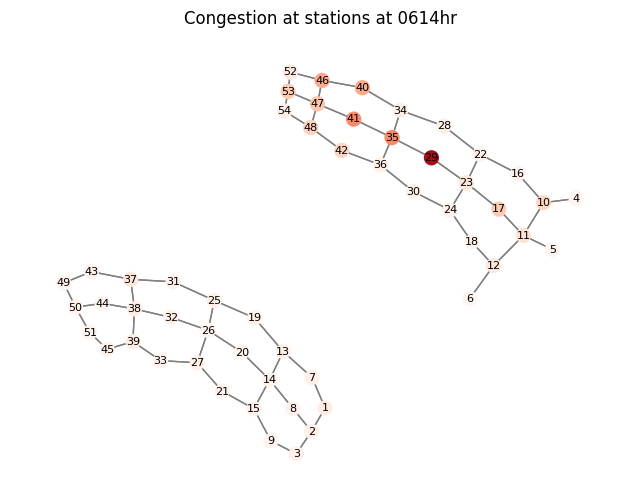

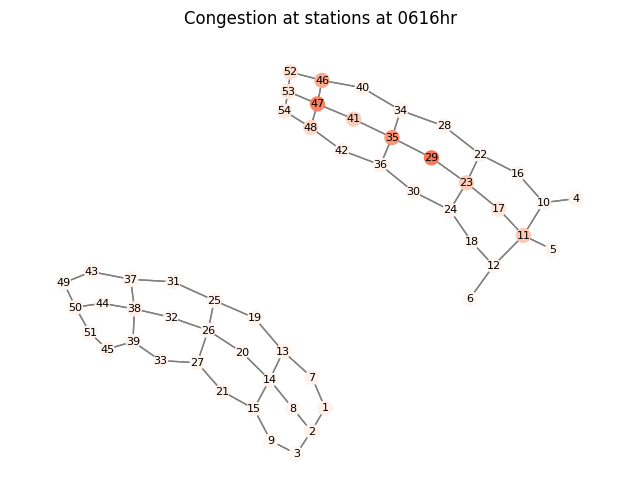

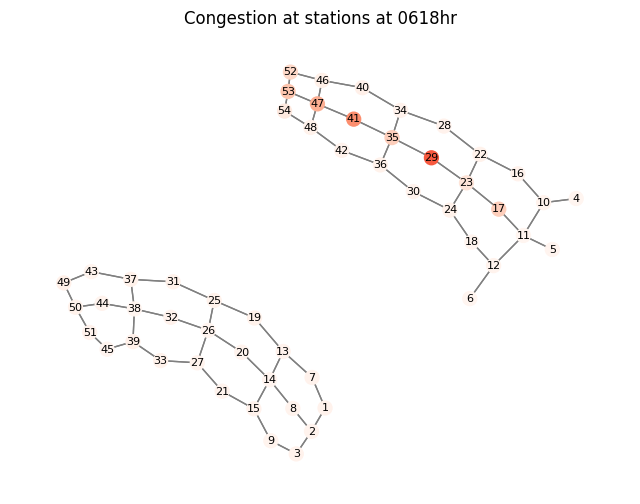

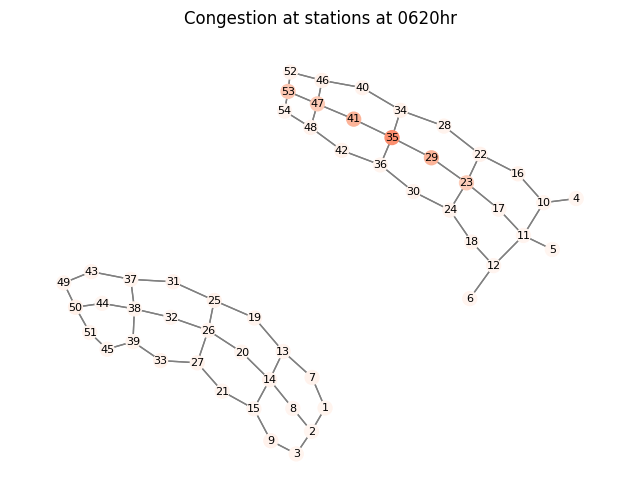

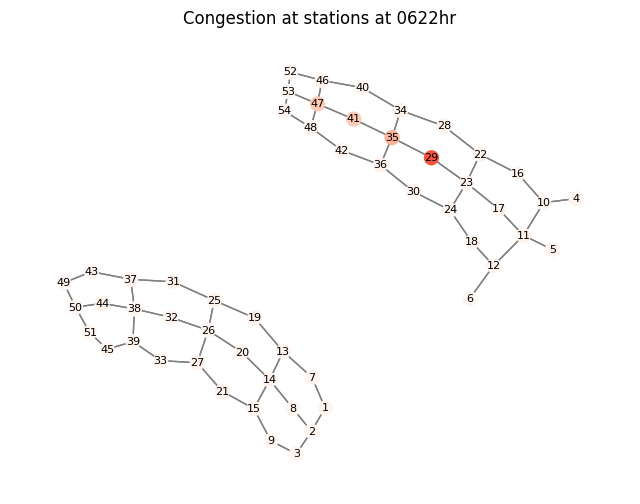

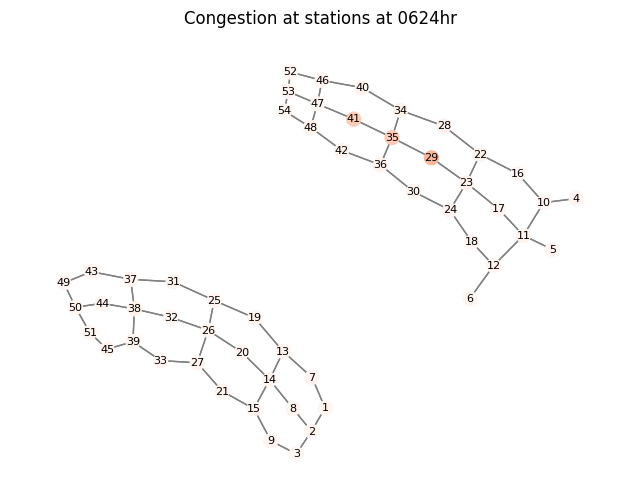

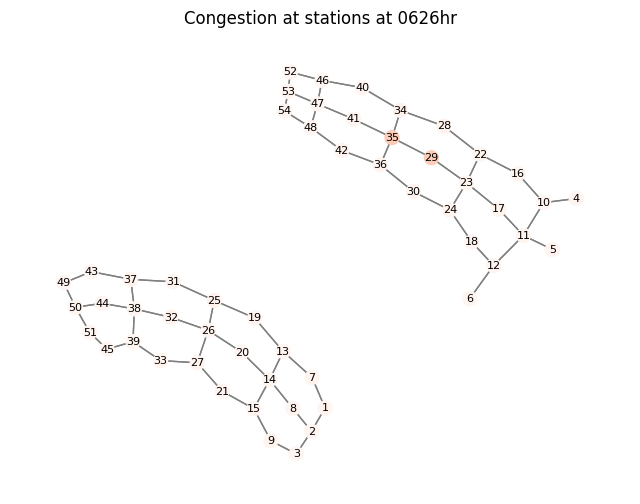

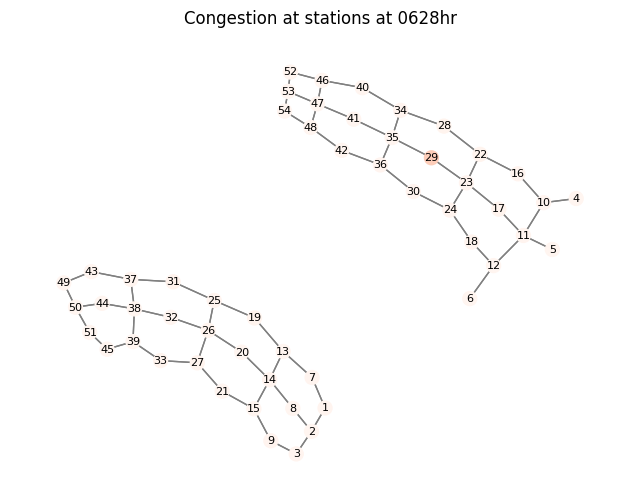

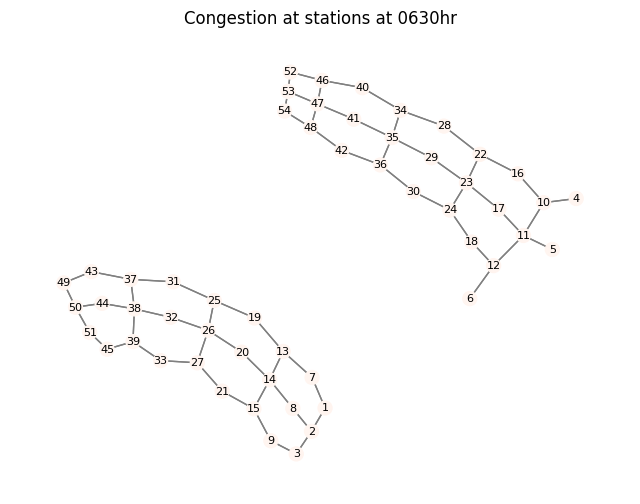

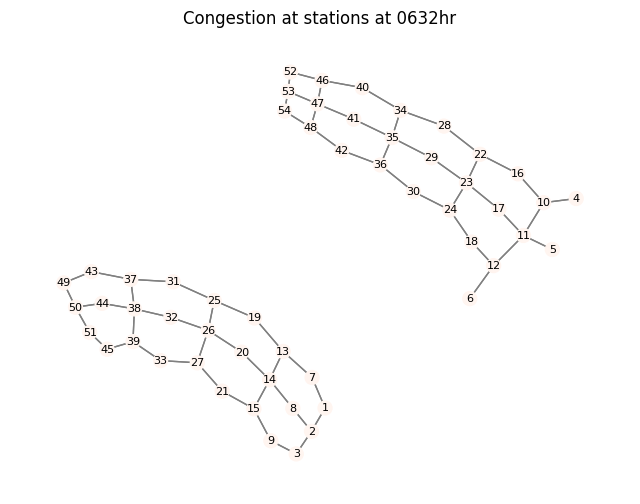

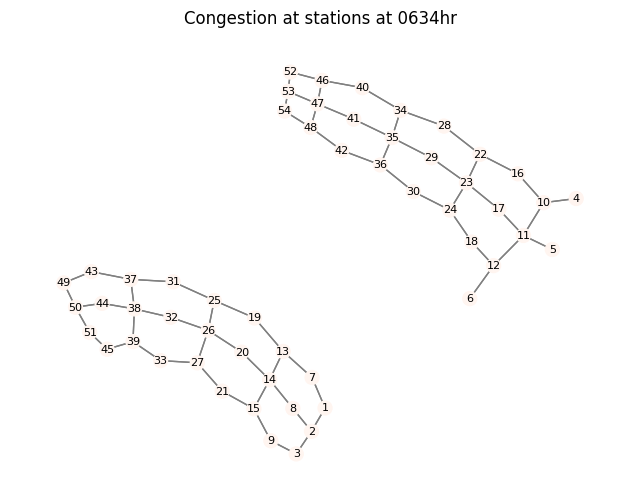

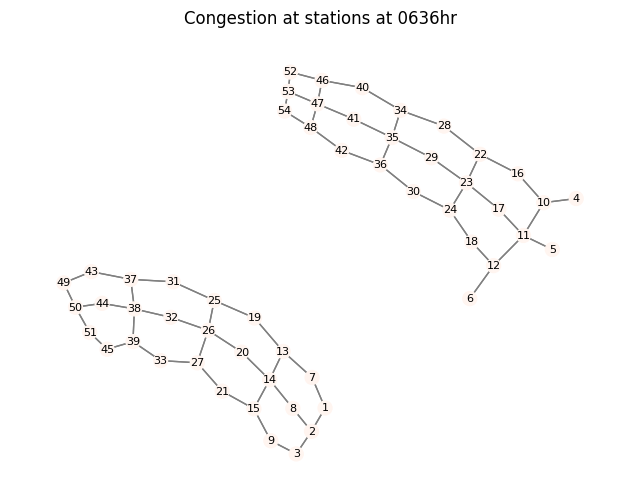

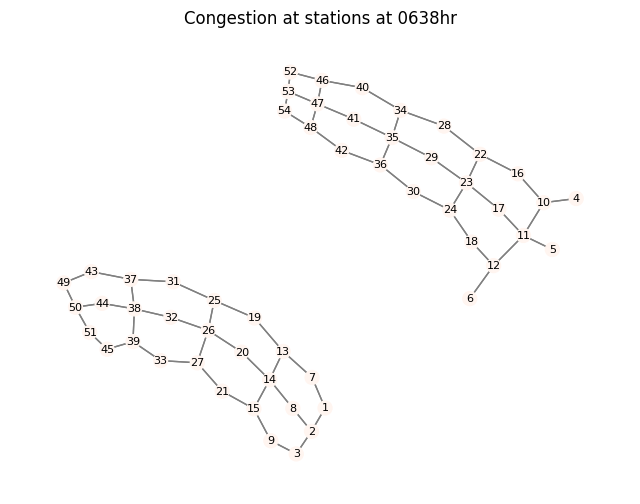

In [139]:
column_names = politician_df.columns[1:20].tolist()
k = 0
for column in column_names:
    people_dict0602 = politician_df[column].value_counts().to_dict()
    if 'nan' in people_dict0602.keys():
        people_dict0602.pop('nan')
    for i in range(1, len(matrix) + 1):
        if str(float(i)) not in people_dict0602:
            people_dict0602[str(float(i))] = 0

    G0602 = nx.DiGraph()

    people_dict0602 = {int(float(key)): value for key, value in people_dict0602.items()}
    people_dict0602 = dict(sorted(people_dict0602.items()))
    # Display the new dictionary with keys as integers

    for station, num_people in people_dict0602.items():
        G0602.add_node(station, size=num_people)  # Set the initial size based on number of people



    # Add edges from adjacency matrix
    for i in range(0,len(matrix)):
        for j in range(0, len(matrix[i])):
            if matrix[i][j] == 1:
                G0602.add_edge(int(float(list(people_dict0602.keys())[i])), int(float(list(people_dict0602.keys())[j])))

    # Extract node sizes from node attributes
    node_sizes = np.array([nx.get_node_attributes(G0602, 'size')[node] for node in G0602.nodes()])

    # Normalize node sizes for colormap
    node_sizes_norm = (node_sizes - np.min(node_sizes)) / (3000 - np.min(node_sizes))

    # Specify colormap
    cmap = plt.cm.get_cmap('Reds')

    # Assign positions to all nodes using spring_layout
    if k == 0:
        pos = nx.spring_layout(G0602, seed=25)

    # Draw the graph with nodes scaled based on initial number of people and colored based on node sizes
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G0602, pos, node_color=node_sizes_norm, cmap=cmap, vmin=0, vmax=1, node_size=100)
    nx.draw_networkx_edges(G0602, pos, edge_color='gray', arrows=False)
    nx.draw_networkx_labels(G0602, pos, font_size=8, font_color='black')
    plt.title("Congestion at stations at " + column)
    plt.axis('off')
    plt.show()
    k += 1




In [140]:
print(df['stations_visited'].value_counts())

(2.0, 8.0, 14.0, 20.0, 26.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)              1489
(38.0, 32.0, 26.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)               996
(47.0, 41.0, 35.0, 29.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)              984
(11.0, 17.0, 23.0, 29.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)              983
(14.0, 20.0, 26.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)               962
                                                                                                                ... 
(30.0, 24.0, 18.0, 12.0, 11.0, 17.0, 23.0, 29.0, 35.0, 41.0, 47.0, nan, nan, nan, nan, nan, nan, nan, nan)         1
(17.0, 23.0, 29.0, 35.0, 41.0, 47.0, 48.0, 42.0, 36.0, 30.0, 24.0, 18.0, 12.0, 6.0, nan, nan, nan, nan, nan)       1
(11.0, 17.0, 23.0, 24.0, 18.0, 12.0, nan, nan, nan, nan, nan, na

In [141]:
df

commuter 0602hr 0604hr 0606hr 0608hr 0610hr 0612hr 0614hr 0616hr 0618hr  \
0            1   37.0   31.0    nan    nan    nan    nan    nan    nan    nan   
1            2   46.0   40.0   34.0   35.0   41.0   47.0    nan    nan    nan   
2            3   36.0   30.0   24.0   18.0   12.0    6.0    nan    nan    nan   
3            4    5.0   11.0   12.0   18.0   24.0   30.0   36.0   42.0   48.0   
4            5   43.0   49.0   50.0   44.0   38.0   32.0   26.0    nan    nan   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995    99996   35.0   41.0    nan    nan    nan    nan    nan    nan    nan   
99996    99997   16.0   22.0   28.0   34.0   35.0   29.0    nan    nan    nan   
99997    99998   46.0   40.0   34.0   28.0   22.0   16.0   10.0    nan    nan   
99998    99999   16.0   10.0   11.0   12.0   18.0   24.0   30.0   36.0    nan   
99999   100000   14.0   20.0   26.0   32.0   38.0   39.0   33.0   27.0   21.0   

       ... 0628hr 0630hr 0632hr 0634hr 0636hr 0638hr  Gender  Occupation  \
0      ...    nan    nan    nan    nan    nan    nan    male  politician   
1      ...    nan    nan    nan    nan    nan    nan  female  politician   
2      ...    nan    nan    nan    nan    nan    nan  female  politician   
3      ...    nan    nan    nan    nan    nan    nan  female  politician   
4      ...    nan    nan    nan    nan    nan    nan    male      worker   
...    ...    ...    ...    ...    ...    ...    ...     ...         ...   
99995  ...    nan    nan    nan    nan    nan    nan    male  politician   
99996  ...    nan    nan    nan    nan    nan    nan    male  politician   
99997  ...    nan    nan    nan    nan    nan    nan    male      worker   
99998  ...    nan    nan    nan    nan    nan    nan    male      worker   
99999  ...    nan    nan    nan    nan    nan    nan  female      worker   

                                        stations_visited end-station  
0      (37.0, 31.0, nan, nan, nan, nan, nan, nan, nan...          31  
1      (46.0, 40.0, 34.0, 35.0, 41.0, 47.0, nan, nan,...          47  
2      (36.0, 30.0, 24.0, 18.0, 12.0, 6.0, nan, nan, ...           6  
3      (5.0, 11.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0...          48  
4      (43.0, 49.0, 50.0, 44.0, 38.0, 32.0, 26.0, nan...          26  
...                                                  ...         ...  
99995  (35.0, 41.0, nan, nan, nan, nan, nan, nan, nan...          41  
99996  (16.0, 22.0, 28.0, 34.0, 35.0, 29.0, nan, nan,...          29  
99997  (46.0, 40.0, 34.0, 28.0, 22.0, 16.0, 10.0, nan...          10  
99998  (16.0, 10.0, 11.0, 12.0, 18.0, 24.0, 30.0, 36....          36  
99999  (14.0, 20.0, 26.0, 32.0, 38.0, 39.0, 33.0, 27....           3  

[100000 rows x 24 columns]